**The following work has been performed under the supervision of Dr. Ekarit Panacharoensawad, Assistant Professor, Department of Petroleum Engineering, Texas Tech University.**

# Notebook Setup

In [1]:
# Common imports
import numpy as np
import pandas as pd
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
LogDat = pd.read_excel(r"C:/Users/Amir's/Desktop/Amir_Adjusted.xlsx")

# Getting an overview of the data

In [366]:
LogDat.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),...,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation,Unnamed: 18,NPOR,"Neutron porosity, calculated assuming a limestone matrix",Unnamed: 21,Unnamed: 22
0,3600.0,29.6276,7.8359,29.0183,26.4565,4.0462,2.2138,-0.0356,0.9126,1.0719,...,5.1127,7.7722,78.7252,22.0122,shaly limestone,NaN,CALI,Caliper,NaN,NaN
1,3600.5,28.5671,7.8418,28.4555,28.7921,4.1226,2.2234,-0.0395,0.8803,1.0008,...,5.0602,7.4297,78.2474,21.6743,shaly limestone,NaN,DPOR,"Density porosity, calculated assuming a limest...",NaN,NaN
2,3601.0,27.1170,7.8434,27.3459,27.4413,4.2350,2.2424,-0.0362,0.8754,0.9679,...,4.9294,7.0917,77.6106,21.2239,shaly limestone,NaN,GR,Gamma,ray,NaN
3,3601.5,24.8582,7.8558,25.3447,25.6896,4.3685,2.2766,-0.0289,0.9005,0.9813,...,5.2303,7.0816,76.7257,20.5981,shaly limestone,NaN,PE,Photoelectric,factor,NaN
4,3602.0,23.1241,7.8720,22.7096,27.0588,4.5133,2.3217,-0.0250,0.9582,1.0502,...,5.2853,7.2144,75.4503,19.6961,shaly limestone,NaN,RHOB,Bulk,density,NaN


In [4]:
LogDat_adj = LogDat.drop(LogDat.columns[[18,19,20,21,22]], axis=1)  # df.columns is zero-based pd.Index 

In [367]:
LogDat_adj.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation
0,3600.0,29.6276,7.8359,29.0183,26.4565,4.0462,2.2138,-0.0356,0.9126,1.0719,5.2530,-68.4118,-20.3987,5.1127,7.7722,78.7252,22.0122,shaly limestone
1,3600.5,28.5671,7.8418,28.4555,28.7921,4.1226,2.2234,-0.0395,0.8803,1.0008,4.6464,-65.0243,-19.9382,5.0602,7.4297,78.2474,21.6743,shaly limestone
2,3601.0,27.1170,7.8434,27.3459,27.4413,4.2350,2.2424,-0.0362,0.8754,0.9679,4.3056,-62.2656,-19.4078,4.9294,7.0917,77.6106,21.2239,shaly limestone
3,3601.5,24.8582,7.8558,25.3447,25.6896,4.3685,2.2766,-0.0289,0.9005,0.9813,4.1801,-60.0036,-18.7673,5.2303,7.0816,76.7257,20.5981,shaly limestone
4,3602.0,23.1241,7.8720,22.7096,27.0588,4.5133,2.3217,-0.0250,0.9582,1.0502,4.1355,-57.1585,-17.8640,5.2853,7.2144,75.4503,19.6961,shaly limestone


In [6]:
LogDat_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 18 columns):
DEPTH                                           1989 non-null float64
Neutron Porosity                                1989 non-null float64
Caliper                                         1989 non-null float64
Density Porosity                                1989 non-null float64
Gamma ray                                       1989 non-null float64
Photoelectric                                   1989 non-null float64
Bulk density                                    1989 non-null float64
Density Correction                              1989 non-null float64
Resistivity (Deep)                              1989 non-null float64
Resistivity (Medium)                            1989 non-null float64
Resistivity (Shallow)                           1989 non-null float64
Ratio (shallow/deep resistivity)                1989 non-null float64
Spontaneous Potential                           1989 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09CA4750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0DACF6F0>]], dtype=object)

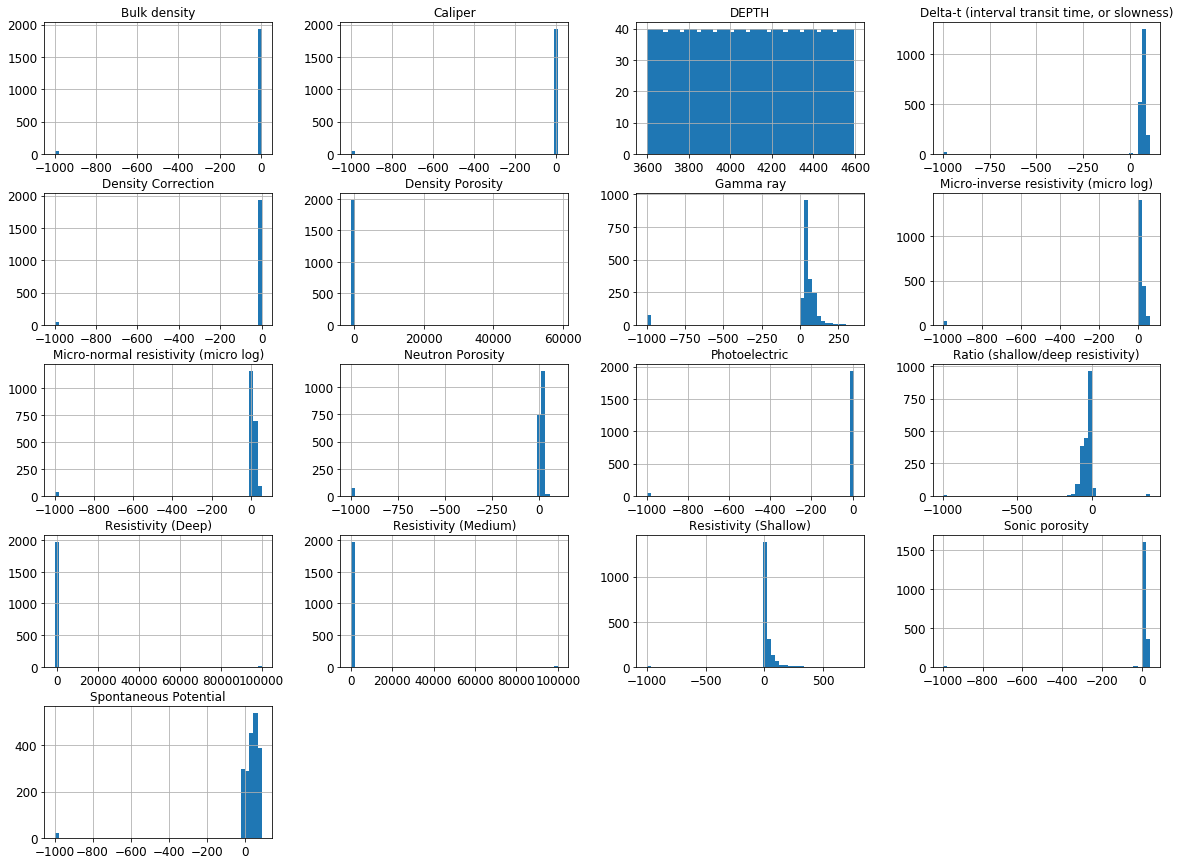

In [7]:
LogDat_adj.hist(bins=50, figsize=(20,15))

In [8]:
LogDat_adj["Type of Formation"].value_counts()

limestone          956
shaly limestone    456
shale              258
dolomite           163
sandstone           59
sandy limestone     38
shaly sandstone      6
Name: Type of Formation, dtype: int64

In [9]:
LogDat_adj.describe()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,4097.000000,-20.183288,-17.790037,15.149971,16.863204,-21.745637,-23.678348,-26.110950,611.082785,668.888914,26.364424,-32.485838,28.171579,-5.352822,-5.786598,60.550176,7.206027
std,287.159581,185.811695,159.254436,1323.847169,210.172649,158.613934,159.884135,159.485422,7746.001211,8058.989422,80.716629,68.841062,110.035585,141.076323,138.991134,93.067429,88.104178
min,3600.000000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,0.933400,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000
25%,3848.500000,9.126500,7.824600,5.306900,33.252500,3.435300,2.411800,-0.027600,3.207600,3.463900,6.482900,-52.762100,20.228000,6.013800,7.326300,61.623200,9.917400
50%,4097.000000,14.206000,7.963200,10.149200,45.027200,4.119000,2.525400,-0.004600,6.791700,7.057600,12.195300,-22.155900,41.508600,9.454500,10.860500,67.248700,13.895900
75%,4345.500000,19.510700,8.116000,16.641000,72.440300,4.509200,2.611900,0.032700,11.986000,13.988200,26.418100,-12.660200,63.621300,19.562200,16.472200,73.485100,18.306300
max,4594.000000,100.000000,10.674400,58594.152300,351.118300,5.908800,3.760500,0.250300,100000.000000,100000.000000,761.316400,392.674500,88.764900,61.073700,55.081500,106.495900,41.652000


# Data Cleaning

In [10]:
inds = pd.isnull(LogDat_adj['Type of Formation']).nonzero()[0]
inds

array([1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988], dtype=int32)

In [11]:
LogDat_prob_GR = LogDat_adj[(LogDat_adj['Gamma ray'] <= -700)]
LogDat_prob_GR.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation
1910,4555.0,26.5237,7.6225,20.0142,-999.25,2.6090,2.3678,0.0404,2.5194,2.4510,4.3735,-21.5584,19.6388,4.5649,5.7073,69.8108,15.7078,dolomite
1911,4555.5,26.6968,7.6137,19.7698,-999.25,2.5529,2.3719,0.0520,2.4917,2.4320,4.1189,-19.6457,19.3252,5.3605,5.4725,69.0965,15.2026,dolomite
1912,4556.0,27.3526,7.5680,19.5087,-999.25,2.5357,2.3764,0.0522,2.4647,2.4350,3.1196,-9.2108,19.2341,4.1063,4.6215,68.9684,15.1120,dolomite
1913,4556.5,28.3447,7.5731,19.3305,-999.25,2.5532,2.3794,0.0462,2.4469,2.4490,3.5166,-14.1763,19.4474,4.5767,5.4416,69.5271,15.5071,dolomite
1914,4557.0,33.4406,7.6147,19.8108,-999.25,2.5530,2.3712,0.0368,2.4500,2.4477,5.0658,-28.3930,19.8138,6.5113,6.7475,70.4744,16.1771,dolomite


In [12]:
LogDat_prob_NP = LogDat_adj[(LogDat_adj['Neutron Porosity'] <= -700)]
LogDat_prob_NP.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation
1920,4560.0,-999.25,7.2890,20.0320,-999.25,2.3696,2.3675,0.1415,2.7566,2.8015,4.6931,-20.7969,20.6447,5.0779,6.6270,72.8398,17.8499,dolomite
1921,4560.5,-999.25,7.0684,18.4702,-999.25,2.1840,2.3942,0.1957,2.8312,2.8722,4.6887,-19.7168,20.7250,5.8167,6.6950,72.4746,17.5916,dolomite
1922,4561.0,-999.25,7.0343,17.4400,-999.25,2.0050,2.4118,0.2296,2.9054,2.9531,4.6327,-18.2357,20.7377,5.3251,6.2995,72.2784,17.4529,dolomite
1923,4561.5,-999.25,7.0373,17.0232,-999.25,1.8791,2.4189,0.2441,2.9639,3.0340,4.5897,-17.0929,20.7974,5.0409,5.8876,72.3258,17.4864,dolomite
1924,4562.0,-999.25,7.0323,17.0760,-999.25,1.8574,2.4180,0.2482,2.9982,3.0811,4.4398,-15.3455,20.9353,4.7036,5.7652,72.4687,17.5875,dolomite


In [13]:
LogDat_drop = LogDat_adj.drop(LogDat_adj.index[1905:1989])

In [14]:
LogDat_drop.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation
0,3600.0,29.6276,7.8359,29.0183,26.4565,4.0462,2.2138,-0.0356,0.9126,1.0719,5.2530,-68.4118,-20.3987,5.1127,7.7722,78.7252,22.0122,shaly limestone
1,3600.5,28.5671,7.8418,28.4555,28.7921,4.1226,2.2234,-0.0395,0.8803,1.0008,4.6464,-65.0243,-19.9382,5.0602,7.4297,78.2474,21.6743,shaly limestone
2,3601.0,27.1170,7.8434,27.3459,27.4413,4.2350,2.2424,-0.0362,0.8754,0.9679,4.3056,-62.2656,-19.4078,4.9294,7.0917,77.6106,21.2239,shaly limestone
3,3601.5,24.8582,7.8558,25.3447,25.6896,4.3685,2.2766,-0.0289,0.9005,0.9813,4.1801,-60.0036,-18.7673,5.2303,7.0816,76.7257,20.5981,shaly limestone
4,3602.0,23.1241,7.8720,22.7096,27.0588,4.5133,2.3217,-0.0250,0.9582,1.0502,4.1355,-57.1585,-17.8640,5.2853,7.2144,75.4503,19.6961,shaly limestone


# Creating a Test : Setting it aside as in never looking at it

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(test_size=0.27,  random_state=42)
for train_index, test_index in split.split(LogDat_drop, LogDat_drop["Type of Formation"]):
    strat_train_set = LogDat_drop.loc[train_index]
    strat_test_set = LogDat_drop.loc[test_index]


In [16]:
strat_train_set

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation
364,3782.0,14.9090,8.0845,10.8138,37.9302,4.3361,2.5251,-0.0403,2.3521,2.4766,7.0462,-42.8840,6.5761,18.2895,15.8936,68.4875,14.7719,limestone
1119,4159.5,5.4242,7.9526,2.0286,87.9380,4.9899,2.6753,-0.0504,12.3318,15.4253,34.3674,-40.0607,19.4222,36.6666,27.7671,53.3764,4.0851,limestone
974,4087.0,26.8415,7.6343,30.5027,30.2045,4.2036,2.1884,-0.0213,23.6848,24.9051,67.3733,-40.8617,-5.8343,8.5468,14.4710,70.9938,16.5444,sandy limestone
481,3840.5,29.6743,10.0896,17.5728,155.6782,3.4528,2.4095,0.1149,2.1401,2.1240,2.8021,-10.5339,63.1526,2.5362,2.0344,91.0397,30.7212,shale
828,4014.0,3.9354,8.1300,3.0607,38.1546,4.9711,2.6577,-0.0481,28.2380,39.9660,162.5017,-68.4021,40.2980,46.6361,28.2133,54.2995,4.7380,limestone
361,3780.5,15.7576,7.8321,13.9503,34.3738,4.1760,2.4714,-0.0261,1.7617,1.9908,7.2125,-55.0948,-8.5466,7.0766,9.8464,69.4630,15.4618,limestone
1628,4414.0,24.1064,8.7090,18.4338,180.3199,3.1915,2.3948,0.1004,5.1816,4.3753,7.3549,-13.6900,71.6885,6.5378,4.3007,90.8278,30.5713,shale
536,3868.0,25.6040,9.1893,19.6051,99.0748,3.1478,2.3748,0.0610,2.2041,2.1413,3.0275,-12.4074,60.8314,2.0710,2.0939,90.5111,30.3473,shaly limestone
1548,4374.0,14.6525,7.9889,8.3089,85.6620,3.4109,2.5679,0.0194,7.9924,7.9791,10.0815,-9.0765,80.6624,16.1564,9.9267,68.7938,14.9886,shaly limestone
1001,4100.5,5.7411,8.0615,4.0265,32.5423,4.8936,2.6411,-0.0136,33.3160,42.2157,48.1978,-14.4337,26.1104,26.5922,26.8800,57.1257,6.7367,limestone


In [17]:
strat_test_set

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation
1501,4350.5,14.3377,7.9358,8.1210,53.0320,4.1425,2.5711,-0.0126,8.2467,8.7727,13.0996,-18.0879,83.4069,14.2095,11.5789,70.6689,16.3146,limestone
377,3788.5,21.5996,7.7935,20.2126,31.8369,3.9984,2.3644,-0.0032,1.3436,1.4921,5.5935,-55.7457,-7.8881,6.3832,9.2743,73.7622,18.5023,limestone
1025,4112.5,9.2560,8.0716,6.8427,63.5457,3.9832,2.5930,0.1195,8.1046,7.6471,26.1792,-45.8304,59.9619,19.7475,15.6692,68.4833,14.7690,shale
819,4009.5,9.8961,8.1299,6.8641,45.8450,4.8488,2.5926,-0.0653,18.2810,18.2213,26.1286,-13.9605,52.6570,23.2709,15.0720,61.6092,9.9075,limestone
1364,4282.0,25.5932,9.6504,32.0067,179.7232,2.5904,2.1627,0.1948,4.4241,3.5417,4.1200,2.7839,71.7486,2.5252,1.8596,92.2882,31.6041,shale
652,3926.0,12.0566,7.6617,7.8241,21.1828,4.3524,2.5762,0.0395,2.9945,4.0550,19.9778,-74.1805,13.4047,6.9916,11.1765,61.9317,10.1356,limestone
196,3698.0,14.6286,8.5282,6.4527,43.7186,4.7996,2.5997,-0.0175,4.7205,5.3410,6.5978,-13.0871,46.7625,9.9384,9.0382,65.8218,12.8867,limestone
931,4065.5,2.4583,8.0370,2.4487,33.2769,5.2405,2.6681,-0.0654,29.3896,93.2097,171.9868,-69.0572,26.5819,49.7344,43.0881,52.0303,3.1332,limestone
737,3968.5,13.5330,8.0725,6.2675,36.5269,4.3165,2.6028,0.0100,4.9044,5.7088,7.4236,-16.2027,32.0076,13.0180,9.4111,61.5920,9.8953,limestone
460,3830.0,17.7343,7.9395,14.6574,84.5551,3.7342,2.4594,-0.0003,2.0027,2.3486,7.5432,-51.8342,30.4475,13.1563,12.1822,78.1573,21.6106,shale


In [18]:
train_objs_num = len(strat_train_set)
train_objs_num

1390

In [19]:
dataset = pd.concat(objs=[strat_train_set, strat_test_set], axis=0)
dataset.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation
364,3782.0,14.9090,8.0845,10.8138,37.9302,4.3361,2.5251,-0.0403,2.3521,2.4766,7.0462,-42.8840,6.5761,18.2895,15.8936,68.4875,14.7719,limestone
1119,4159.5,5.4242,7.9526,2.0286,87.9380,4.9899,2.6753,-0.0504,12.3318,15.4253,34.3674,-40.0607,19.4222,36.6666,27.7671,53.3764,4.0851,limestone
974,4087.0,26.8415,7.6343,30.5027,30.2045,4.2036,2.1884,-0.0213,23.6848,24.9051,67.3733,-40.8617,-5.8343,8.5468,14.4710,70.9938,16.5444,sandy limestone
481,3840.5,29.6743,10.0896,17.5728,155.6782,3.4528,2.4095,0.1149,2.1401,2.1240,2.8021,-10.5339,63.1526,2.5362,2.0344,91.0397,30.7212,shale
828,4014.0,3.9354,8.1300,3.0607,38.1546,4.9711,2.6577,-0.0481,28.2380,39.9660,162.5017,-68.4021,40.2980,46.6361,28.2133,54.2995,4.7380,limestone


In [20]:
dataset_preprocessed = pd.get_dummies(dataset)
dataset_preprocessed.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),...,Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation_dolomite,Type of Formation_limestone,Type of Formation_sandstone,Type of Formation_sandy limestone,Type of Formation_shale,Type of Formation_shaly limestone,Type of Formation_shaly sandstone
364,3782.0,14.9090,8.0845,10.8138,37.9302,4.3361,2.5251,-0.0403,2.3521,2.4766,...,15.8936,68.4875,14.7719,0,1,0,0,0,0,0
1119,4159.5,5.4242,7.9526,2.0286,87.9380,4.9899,2.6753,-0.0504,12.3318,15.4253,...,27.7671,53.3764,4.0851,0,1,0,0,0,0,0
974,4087.0,26.8415,7.6343,30.5027,30.2045,4.2036,2.1884,-0.0213,23.6848,24.9051,...,14.4710,70.9938,16.5444,0,0,0,1,0,0,0
481,3840.5,29.6743,10.0896,17.5728,155.6782,3.4528,2.4095,0.1149,2.1401,2.1240,...,2.0344,91.0397,30.7212,0,0,0,0,1,0,0
828,4014.0,3.9354,8.1300,3.0607,38.1546,4.9711,2.6577,-0.0481,28.2380,39.9660,...,28.2133,54.2995,4.7380,0,1,0,0,0,0,0


In [21]:
train_preprocessed = dataset_preprocessed[:train_objs_num]
train_preprocessed.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),...,Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation_dolomite,Type of Formation_limestone,Type of Formation_sandstone,Type of Formation_sandy limestone,Type of Formation_shale,Type of Formation_shaly limestone,Type of Formation_shaly sandstone
364,3782.0,14.9090,8.0845,10.8138,37.9302,4.3361,2.5251,-0.0403,2.3521,2.4766,...,15.8936,68.4875,14.7719,0,1,0,0,0,0,0
1119,4159.5,5.4242,7.9526,2.0286,87.9380,4.9899,2.6753,-0.0504,12.3318,15.4253,...,27.7671,53.3764,4.0851,0,1,0,0,0,0,0
974,4087.0,26.8415,7.6343,30.5027,30.2045,4.2036,2.1884,-0.0213,23.6848,24.9051,...,14.4710,70.9938,16.5444,0,0,0,1,0,0,0
481,3840.5,29.6743,10.0896,17.5728,155.6782,3.4528,2.4095,0.1149,2.1401,2.1240,...,2.0344,91.0397,30.7212,0,0,0,0,1,0,0
828,4014.0,3.9354,8.1300,3.0607,38.1546,4.9711,2.6577,-0.0481,28.2380,39.9660,...,28.2133,54.2995,4.7380,0,1,0,0,0,0,0


In [22]:
test_preprocessed = dataset_preprocessed[train_objs_num:]
test_preprocessed.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),...,Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation_dolomite,Type of Formation_limestone,Type of Formation_sandstone,Type of Formation_sandy limestone,Type of Formation_shale,Type of Formation_shaly limestone,Type of Formation_shaly sandstone
1501,4350.5,14.3377,7.9358,8.1210,53.0320,4.1425,2.5711,-0.0126,8.2467,8.7727,...,11.5789,70.6689,16.3146,0,1,0,0,0,0,0
377,3788.5,21.5996,7.7935,20.2126,31.8369,3.9984,2.3644,-0.0032,1.3436,1.4921,...,9.2743,73.7622,18.5023,0,1,0,0,0,0,0
1025,4112.5,9.2560,8.0716,6.8427,63.5457,3.9832,2.5930,0.1195,8.1046,7.6471,...,15.6692,68.4833,14.7690,0,0,0,0,1,0,0
819,4009.5,9.8961,8.1299,6.8641,45.8450,4.8488,2.5926,-0.0653,18.2810,18.2213,...,15.0720,61.6092,9.9075,0,1,0,0,0,0,0
1364,4282.0,25.5932,9.6504,32.0067,179.7232,2.5904,2.1627,0.1948,4.4241,3.5417,...,1.8596,92.2882,31.6041,0,0,0,0,1,0,0


# Preparing the data for Machine Learning algorithms

**Creating a copy of training set so that no harm is done to original training set**

In [23]:
LogDat_train_new = strat_train_set.copy()

In [24]:
train_preprocessed.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),...,Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation_dolomite,Type of Formation_limestone,Type of Formation_sandstone,Type of Formation_sandy limestone,Type of Formation_shale,Type of Formation_shaly limestone,Type of Formation_shaly sandstone
364,3782.0,14.9090,8.0845,10.8138,37.9302,4.3361,2.5251,-0.0403,2.3521,2.4766,...,15.8936,68.4875,14.7719,0,1,0,0,0,0,0
1119,4159.5,5.4242,7.9526,2.0286,87.9380,4.9899,2.6753,-0.0504,12.3318,15.4253,...,27.7671,53.3764,4.0851,0,1,0,0,0,0,0
974,4087.0,26.8415,7.6343,30.5027,30.2045,4.2036,2.1884,-0.0213,23.6848,24.9051,...,14.4710,70.9938,16.5444,0,0,0,1,0,0,0
481,3840.5,29.6743,10.0896,17.5728,155.6782,3.4528,2.4095,0.1149,2.1401,2.1240,...,2.0344,91.0397,30.7212,0,0,0,0,1,0,0
828,4014.0,3.9354,8.1300,3.0607,38.1546,4.9711,2.6577,-0.0481,28.2380,39.9660,...,28.2133,54.2995,4.7380,0,1,0,0,0,0,0


In [25]:
LogDat_train_num = train_preprocessed.drop(train_preprocessed.loc[:,'Type of Formation_dolomite':
                                                                 'Type of Formation_shaly sandstone'].head(0).columns, axis=1)
LogDat_train_num.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity
364,3782.0,14.9090,8.0845,10.8138,37.9302,4.3361,2.5251,-0.0403,2.3521,2.4766,7.0462,-42.8840,6.5761,18.2895,15.8936,68.4875,14.7719
1119,4159.5,5.4242,7.9526,2.0286,87.9380,4.9899,2.6753,-0.0504,12.3318,15.4253,34.3674,-40.0607,19.4222,36.6666,27.7671,53.3764,4.0851
974,4087.0,26.8415,7.6343,30.5027,30.2045,4.2036,2.1884,-0.0213,23.6848,24.9051,67.3733,-40.8617,-5.8343,8.5468,14.4710,70.9938,16.5444
481,3840.5,29.6743,10.0896,17.5728,155.6782,3.4528,2.4095,0.1149,2.1401,2.1240,2.8021,-10.5339,63.1526,2.5362,2.0344,91.0397,30.7212
828,4014.0,3.9354,8.1300,3.0607,38.1546,4.9711,2.6577,-0.0481,28.2380,39.9660,162.5017,-68.4021,40.2980,46.6361,28.2133,54.2995,4.7380


In [26]:
LogDat_train_labels = train_preprocessed.drop(train_preprocessed.loc[:,'DEPTH':
                                                                 'Sonic porosity'].head(0).columns, axis=1)
LogDat_train_labels.head()

,Type of Formation_dolomite,Type of Formation_limestone,Type of Formation_sandstone,Type of Formation_sandy limestone,Type of Formation_shale,Type of Formation_shaly limestone,Type of Formation_shaly sandstone
364,0,1,0,0,0,0,0
1119,0,1,0,0,0,0,0
974,0,0,0,1,0,0,0
481,0,0,0,0,1,0,0
828,0,1,0,0,0,0,0


In [27]:
test_preprocessed.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),...,Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity,Type of Formation_dolomite,Type of Formation_limestone,Type of Formation_sandstone,Type of Formation_sandy limestone,Type of Formation_shale,Type of Formation_shaly limestone,Type of Formation_shaly sandstone
1501,4350.5,14.3377,7.9358,8.1210,53.0320,4.1425,2.5711,-0.0126,8.2467,8.7727,...,11.5789,70.6689,16.3146,0,1,0,0,0,0,0
377,3788.5,21.5996,7.7935,20.2126,31.8369,3.9984,2.3644,-0.0032,1.3436,1.4921,...,9.2743,73.7622,18.5023,0,1,0,0,0,0,0
1025,4112.5,9.2560,8.0716,6.8427,63.5457,3.9832,2.5930,0.1195,8.1046,7.6471,...,15.6692,68.4833,14.7690,0,0,0,0,1,0,0
819,4009.5,9.8961,8.1299,6.8641,45.8450,4.8488,2.5926,-0.0653,18.2810,18.2213,...,15.0720,61.6092,9.9075,0,1,0,0,0,0,0
1364,4282.0,25.5932,9.6504,32.0067,179.7232,2.5904,2.1627,0.1948,4.4241,3.5417,...,1.8596,92.2882,31.6041,0,0,0,0,1,0,0


In [28]:
LogDat_test_num = test_preprocessed.drop(test_preprocessed.loc[:,'Type of Formation_dolomite':
                                                                 'Type of Formation_shaly sandstone'].head(0).columns, axis=1)
LogDat_test_num.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity
1501,4350.5,14.3377,7.9358,8.1210,53.0320,4.1425,2.5711,-0.0126,8.2467,8.7727,13.0996,-18.0879,83.4069,14.2095,11.5789,70.6689,16.3146
377,3788.5,21.5996,7.7935,20.2126,31.8369,3.9984,2.3644,-0.0032,1.3436,1.4921,5.5935,-55.7457,-7.8881,6.3832,9.2743,73.7622,18.5023
1025,4112.5,9.2560,8.0716,6.8427,63.5457,3.9832,2.5930,0.1195,8.1046,7.6471,26.1792,-45.8304,59.9619,19.7475,15.6692,68.4833,14.7690
819,4009.5,9.8961,8.1299,6.8641,45.8450,4.8488,2.5926,-0.0653,18.2810,18.2213,26.1286,-13.9605,52.6570,23.2709,15.0720,61.6092,9.9075
1364,4282.0,25.5932,9.6504,32.0067,179.7232,2.5904,2.1627,0.1948,4.4241,3.5417,4.1200,2.7839,71.7486,2.5252,1.8596,92.2882,31.6041


In [29]:
LogDat_test_labels = test_preprocessed.drop(test_preprocessed.loc[:,'DEPTH':
                                                                 'Sonic porosity'].head(0).columns, axis=1)
LogDat_test_labels.head()

,Type of Formation_dolomite,Type of Formation_limestone,Type of Formation_sandstone,Type of Formation_sandy limestone,Type of Formation_shale,Type of Formation_shaly limestone,Type of Formation_shaly sandstone
1501,0,1,0,0,0,0,0
377,0,1,0,0,0,0,0
1025,0,0,0,0,1,0,0
819,0,1,0,0,0,0,0
1364,0,0,0,0,1,0,0


In [30]:
LogDat_test_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 1501 to 368
Data columns (total 7 columns):
Type of Formation_dolomite           515 non-null uint8
Type of Formation_limestone          515 non-null uint8
Type of Formation_sandstone          515 non-null uint8
Type of Formation_sandy limestone    515 non-null uint8
Type of Formation_shale              515 non-null uint8
Type of Formation_shaly limestone    515 non-null uint8
Type of Formation_shaly sandstone    515 non-null uint8
dtypes: uint8(7)
memory usage: 7.5 KB


In [31]:
LogDat_test_labels.sum()

Type of Formation_dolomite            36
Type of Formation_limestone          258
Type of Formation_sandstone           16
Type of Formation_sandy limestone     10
Type of Formation_shale               70
Type of Formation_shaly limestone    123
Type of Formation_shaly sandstone      2
dtype: int64

In [32]:
LogDat_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 364 to 1301
Data columns (total 7 columns):
Type of Formation_dolomite           1390 non-null uint8
Type of Formation_limestone          1390 non-null uint8
Type of Formation_sandstone          1390 non-null uint8
Type of Formation_sandy limestone    1390 non-null uint8
Type of Formation_shale              1390 non-null uint8
Type of Formation_shaly limestone    1390 non-null uint8
Type of Formation_shaly sandstone    1390 non-null uint8
dtypes: uint8(7)
memory usage: 20.4 KB


In [33]:
LogDat_train_labels.sum()

Type of Formation_dolomite            96
Type of Formation_limestone          698
Type of Formation_sandstone           43
Type of Formation_sandy limestone     28
Type of Formation_shale              188
Type of Formation_shaly limestone    333
Type of Formation_shaly sandstone      4
dtype: int64

**Data Visualization after cleaning the data**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114E5570>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119A7350>]], dtype=object)

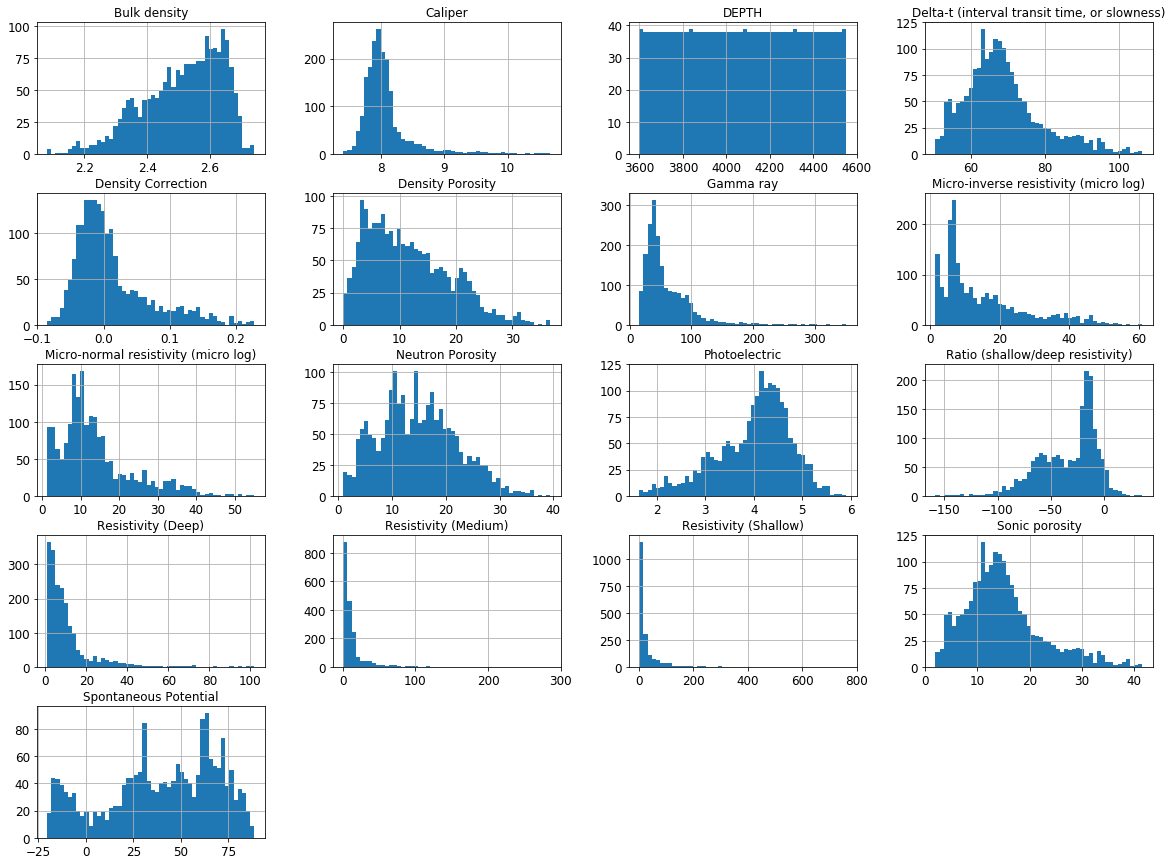

In [34]:
LogDat_drop.hist(bins=50, figsize=(20,15))

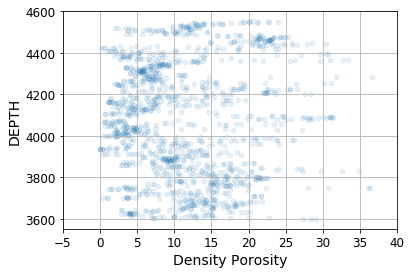

In [35]:
LogDat_train_new.plot(kind = "scatter", x ="Density Porosity", y ="DEPTH",grid = True, xlim=[-5,40],
                    alpha =0.1) 

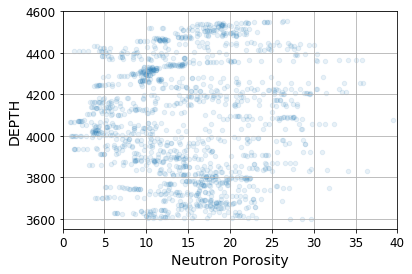

In [36]:
LogDat_train_new.plot(kind = "scatter", x ="Neutron Porosity", y ="DEPTH",grid = True, xlim=[0,40],alpha=0.1)
# A number of off-points on the right

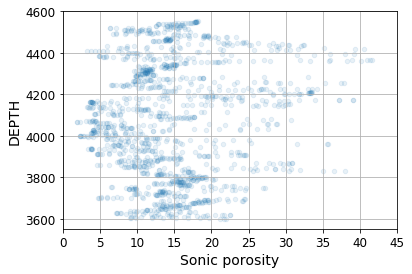

In [37]:
LogDat_train_new.plot(kind = "scatter", x ="Sonic porosity", y ="DEPTH",grid = True, xlim=[0,45],alpha=0.1)

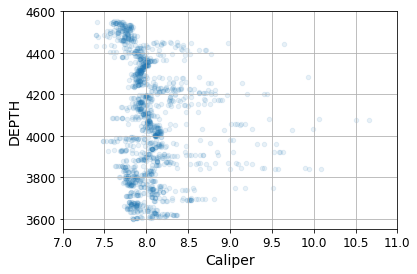

In [38]:
LogDat_train_new.plot(kind = "scatter", x ="Caliper", y ="DEPTH",grid = True, xlim=[7,11],alpha=0.1)

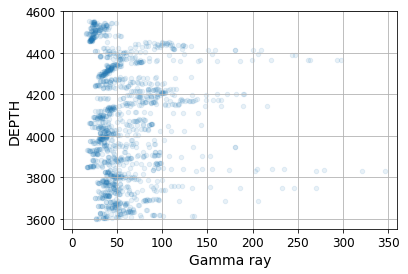

In [39]:
LogDat_train_new.plot(kind = "scatter", x ="Gamma ray", y ="DEPTH",grid = True, xlim=[-10,360],alpha=0.1)

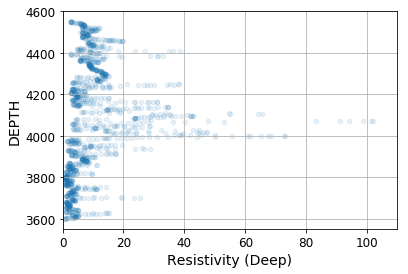

In [40]:
LogDat_train_new.plot(kind = "scatter", x ="Resistivity (Deep)", y ="DEPTH",grid = True, xlim=[0,110]
                    ,alpha =0.1)

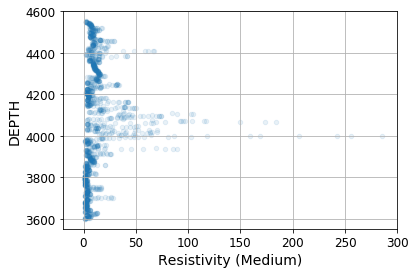

In [41]:
LogDat_train_new.plot(kind = "scatter", x ="Resistivity (Medium)", y ="DEPTH",grid = True, xlim=[-20,300]
                    ,alpha =0.1)

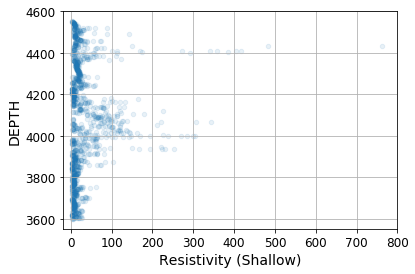

In [42]:
LogDat_train_new.plot(kind = "scatter", x ="Resistivity (Shallow)", y ="DEPTH",grid = True, xlim=[-20,800]
                    ,alpha =0.1)

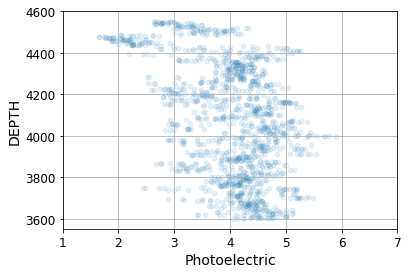

In [43]:
LogDat_train_new.plot(kind = "scatter", x ="Photoelectric", y ="DEPTH",grid = True, xlim=[1,7],alpha=0.1)

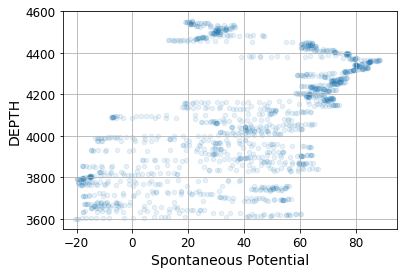

In [44]:
LogDat_train_new.plot(kind = "scatter", x ="Spontaneous Potential", y ="DEPTH",grid = True, xlim=[-25,95],alpha=0.1)

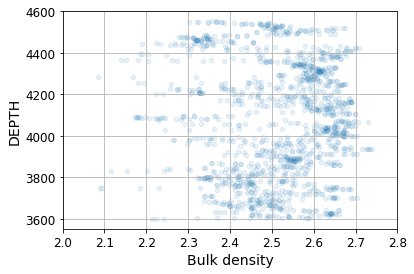

In [45]:
LogDat_train_new.plot(kind = "scatter", x ="Bulk density", y ="DEPTH",grid = True, xlim=[2,2.8],alpha=0.1) 

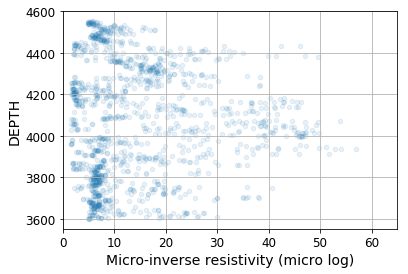

In [46]:
LogDat_train_new.plot(kind = "scatter", x ="Micro-inverse resistivity (micro log)", y ="DEPTH",grid = True, xlim=[0,65]
                    ,alpha=0.1) #Off-point on the left again in this log as well

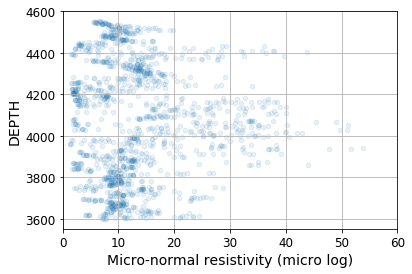

In [47]:
LogDat_train_new.plot(kind = "scatter", x ="Micro-normal resistivity (micro log)", y ="DEPTH",grid = True, xlim=[0,60]
                    ,alpha=0.1)

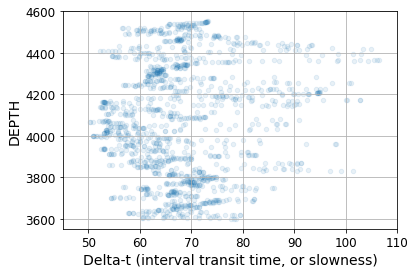

In [48]:
LogDat_train_new.plot(kind = "scatter", x ="Delta-t (interval transit time, or slowness)", y ="DEPTH",grid = True, 
                     xlim=[45,110], alpha=0.1)

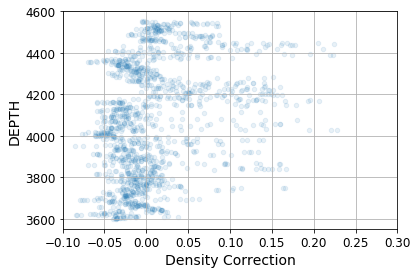

In [49]:
LogDat_train_new.plot(kind = "scatter", x ="Density Correction", y ="DEPTH",grid = True, 
                     xlim=[-0.1,0.3], alpha=0.1)

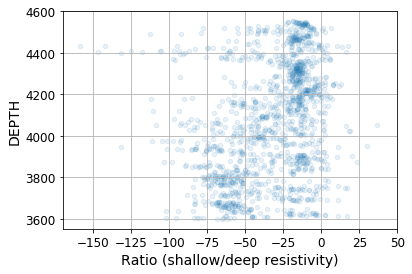

In [50]:
LogDat_train_new.plot(kind = "scatter", x ="Ratio (shallow/deep resistivity)", y ="DEPTH",grid = True, 
                     xlim=[-170,50], alpha=0.1)

# ** Feature Scaling **

Since, Log data has a lot of noise in the data, if we choose the MinMax Scaler, which is sensitive to noise, we would have a bad training example. So, instead we are going to try and use StandardScaler instead which is much less sensitive to outliers.

In [51]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
LogDat_train_copy = LogDat_train_num.copy()
LogDat_train_scaled = std_scaler.fit_transform(LogDat_train_copy)
LogDat_train_scaled

array([[ -1.05005254e+00,   1.66138577e-03,   9.97496737e-02, ...,
          2.48495548e-01,  -1.97490010e-02,  -1.97525730e-02],
       [  3.25716993e-01,  -1.33346182e+00,  -2.65951524e-01, ...,
          1.55079941e+00,  -1.46864611e+00,  -1.46865324e+00],
       [  6.14963541e-02,   1.68133388e+00,  -1.14845866e+00, ...,
          9.24625785e-02,   2.20562481e-01,   2.20560377e-01],
       ..., 
       [  1.68508663e+00,   5.76360644e-01,  -6.94867182e-01, ...,
         -4.15132656e-01,   1.29627074e-01,   1.29627855e-01],
       [  1.59033164e+00,   3.27573452e-01,  -1.32978435e+00, ...,
         -2.60448770e-01,  -5.68468048e-01,  -5.68466011e-01],
       [  6.57359450e-01,  -7.82045015e-01,  -2.07450423e-01, ...,
          4.80340404e-01,  -5.75275738e-01,  -5.75285611e-01]])

**Final training and test sets after standard scaling**:

In [52]:
X_train = LogDat_train_scaled

In [53]:
X_train.shape

(1390, 17)

In [54]:
X_train

array([[ -1.05005254e+00,   1.66138577e-03,   9.97496737e-02, ...,
          2.48495548e-01,  -1.97490010e-02,  -1.97525730e-02],
       [  3.25716993e-01,  -1.33346182e+00,  -2.65951524e-01, ...,
          1.55079941e+00,  -1.46864611e+00,  -1.46865324e+00],
       [  6.14963541e-02,   1.68133388e+00,  -1.14845866e+00, ...,
          9.24625785e-02,   2.20562481e-01,   2.20560377e-01],
       ..., 
       [  1.68508663e+00,   5.76360644e-01,  -6.94867182e-01, ...,
         -4.15132656e-01,   1.29627074e-01,   1.29627855e-01],
       [  1.59033164e+00,   3.27573452e-01,  -1.32978435e+00, ...,
         -2.60448770e-01,  -5.68468048e-01,  -5.68466011e-01],
       [  6.57359450e-01,  -7.82045015e-01,  -2.07450423e-01, ...,
          4.80340404e-01,  -5.75275738e-01,  -5.75285611e-01]])

In [55]:
y_train = LogDat_train_labels.copy()
y_train.head()

,Type of Formation_dolomite,Type of Formation_limestone,Type of Formation_sandstone,Type of Formation_sandy limestone,Type of Formation_shale,Type of Formation_shaly limestone,Type of Formation_shaly sandstone
364,0,1,0,0,0,0,0
1119,0,1,0,0,0,0,0
974,0,0,0,1,0,0,0
481,0,0,0,0,1,0,0
828,0,1,0,0,0,0,0


In [56]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 364 to 1301
Data columns (total 7 columns):
Type of Formation_dolomite           1390 non-null uint8
Type of Formation_limestone          1390 non-null uint8
Type of Formation_sandstone          1390 non-null uint8
Type of Formation_sandy limestone    1390 non-null uint8
Type of Formation_shale              1390 non-null uint8
Type of Formation_shaly limestone    1390 non-null uint8
Type of Formation_shaly sandstone    1390 non-null uint8
dtypes: uint8(7)
memory usage: 20.4 KB


In [57]:
y_train.shape

(1390, 7)

In [58]:
X_test_new = LogDat_test_num.copy()
X_test_new.head()

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity
1501,4350.5,14.3377,7.9358,8.1210,53.0320,4.1425,2.5711,-0.0126,8.2467,8.7727,13.0996,-18.0879,83.4069,14.2095,11.5789,70.6689,16.3146
377,3788.5,21.5996,7.7935,20.2126,31.8369,3.9984,2.3644,-0.0032,1.3436,1.4921,5.5935,-55.7457,-7.8881,6.3832,9.2743,73.7622,18.5023
1025,4112.5,9.2560,8.0716,6.8427,63.5457,3.9832,2.5930,0.1195,8.1046,7.6471,26.1792,-45.8304,59.9619,19.7475,15.6692,68.4833,14.7690
819,4009.5,9.8961,8.1299,6.8641,45.8450,4.8488,2.5926,-0.0653,18.2810,18.2213,26.1286,-13.9605,52.6570,23.2709,15.0720,61.6092,9.9075
1364,4282.0,25.5932,9.6504,32.0067,179.7232,2.5904,2.1627,0.1948,4.4241,3.5417,4.1200,2.7839,71.7486,2.5252,1.8596,92.2882,31.6041


In [59]:
X_test_prepared = std_scaler.transform(X_test_new)
X_test_prepared

array([[ 1.02180171, -0.07875738, -0.3125306 , ..., -0.22474743,
         0.1894101 ,  0.18940443],
       [-1.02636379,  0.94346041, -0.70706646, ..., -0.47751952,
         0.48600489,  0.48600959],
       [ 0.15442913, -0.79408038,  0.0639836 , ...,  0.22388301,
        -0.02015171, -0.02014575],
       ..., 
       [ 1.63770913, -0.5776831 , -0.74920944, ...,  0.23111102,
        -1.01128436, -1.01127906],
       [ 1.2787335 ,  1.87064807, -0.8188008 , ..., -1.27187716,
         3.28191387,  3.28191009],
       [-1.0427637 , -0.06266799,  0.11777134, ..., -0.44686353,
         0.18954434,  0.18954001]])

In [60]:
y_test_new = LogDat_test_labels.copy()
y_test_new.head()

,Type of Formation_dolomite,Type of Formation_limestone,Type of Formation_sandstone,Type of Formation_sandy limestone,Type of Formation_shale,Type of Formation_shaly limestone,Type of Formation_shaly sandstone
1501,0,1,0,0,0,0,0
377,0,1,0,0,0,0,0
1025,0,0,0,0,1,0,0
819,0,1,0,0,0,0,0
1364,0,0,0,0,1,0,0


In [61]:
y_train.sum()

Type of Formation_dolomite            96
Type of Formation_limestone          698
Type of Formation_sandstone           43
Type of Formation_sandy limestone     28
Type of Formation_shale              188
Type of Formation_shaly limestone    333
Type of Formation_shaly sandstone      4
dtype: int64

In [62]:
y_test_new.sum()

Type of Formation_dolomite            36
Type of Formation_limestone          258
Type of Formation_sandstone           16
Type of Formation_sandy limestone     10
Type of Formation_shale               70
Type of Formation_shaly limestone    123
Type of Formation_shaly sandstone      2
dtype: int64

In [63]:
y_train_sl = y_train["Type of Formation_shaly limestone"]
y_train_sl.head()

364     0
1119    0
974     0
481     0
828     0
Name: Type of Formation_shaly limestone, dtype: uint8

In [64]:
y_train_sl.shape

(1390,)

In [65]:
y_test_sl = y_test_new["Type of Formation_shaly limestone"]
y_test_sl.head()

1501    0
377     0
1025    0
819     0
1364    0
Name: Type of Formation_shaly limestone, dtype: uint8

In [66]:
y_test_sl.shape

(515,)

# Feature relationships that might be helpful for dimensionality reduction

In [67]:
corr_matrix = LogDat_train_new.corr()
corr_matrix

,DEPTH,Neutron Porosity,Caliper,Density Porosity,Gamma ray,Photoelectric,Bulk density,Density Correction,Resistivity (Deep),Resistivity (Medium),Resistivity (Shallow),Ratio (shallow/deep resistivity),Spontaneous Potential,Micro-inverse resistivity (micro log),Micro-normal resistivity (micro log),"Delta-t (interval transit time, or slowness)",Sonic porosity
DEPTH,1.000000,0.026227,-0.160925,0.006949,-0.015251,-0.426672,-0.007264,0.288437,0.185614,0.092778,0.110453,0.309388,0.518315,0.000968,-0.014199,0.086516,0.086517
Neutron Porosity,0.026227,1.000000,0.346474,0.792338,0.492634,-0.609484,-0.792846,0.382943,-0.507277,-0.454351,-0.485645,0.305985,-0.019830,-0.764768,-0.779691,0.865844,0.865844
Caliper,-0.160925,0.346474,1.000000,0.210884,0.508586,-0.154071,-0.210553,0.407552,-0.099120,-0.068459,-0.120676,0.351541,0.373152,-0.151633,-0.258649,0.481840,0.481840
Density Porosity,0.006949,0.792338,0.210884,1.000000,0.350939,-0.719724,-0.999907,0.362429,-0.366280,-0.330421,-0.362159,0.189555,-0.208932,-0.661448,-0.632128,0.726317,0.726317
Gamma ray,-0.015251,0.492634,0.508586,0.350939,1.000000,-0.289496,-0.350993,0.378688,-0.190353,-0.181184,-0.180270,0.336097,0.413603,-0.236857,-0.352367,0.692064,0.692064
Photoelectric,-0.426672,-0.609484,-0.154071,-0.719724,-0.289496,1.000000,0.720067,-0.587235,0.331234,0.337320,0.364613,-0.408454,-0.148010,0.592701,0.617986,-0.662070,-0.662070
Bulk density,-0.007264,-0.792846,-0.210553,-0.999907,-0.350993,0.720067,1.000000,-0.362460,0.367284,0.333102,0.365009,-0.190888,0.208345,0.662540,0.633809,-0.726637,-0.726636
Density Correction,0.288437,0.382943,0.407552,0.362429,0.378688,-0.587235,-0.362460,1.000000,-0.254869,-0.245138,-0.203270,0.262263,0.314356,-0.373911,-0.414038,0.537983,0.537983
Resistivity (Deep),0.185614,-0.507277,-0.099120,-0.366280,-0.190353,0.331234,0.367284,-0.254869,1.000000,0.864562,0.579356,0.057239,0.055853,0.601999,0.607740,-0.486506,-0.486506
Resistivity (Medium),0.092778,-0.454351,-0.068459,-0.330421,-0.181184,0.337320,0.333102,-0.245138,0.864562,1.000000,0.666370,-0.080670,-0.027903,0.569596,0.584128,-0.442307,-0.442307


The above table individually shows relationship of each feature with each other. The more positive towards a feature a certain another feature is, the more likely it will increase with the increase in the corresponding quantity (e.g. Neutron log has a strong correlation with gamma ray, bulk density, caliper and photoelectrics logs etc. and are likely to go up with increase in any of these quantities).

0 means that a quantity has no relation with that feature.

The more negative a value would be in relation with that feature, the value has an inverse relation with that feature (e.g. -0.76 of relationship of Resistivity with SP log).

The correlation coefficient measures linear correlations though and does not account for non-linear correlations.

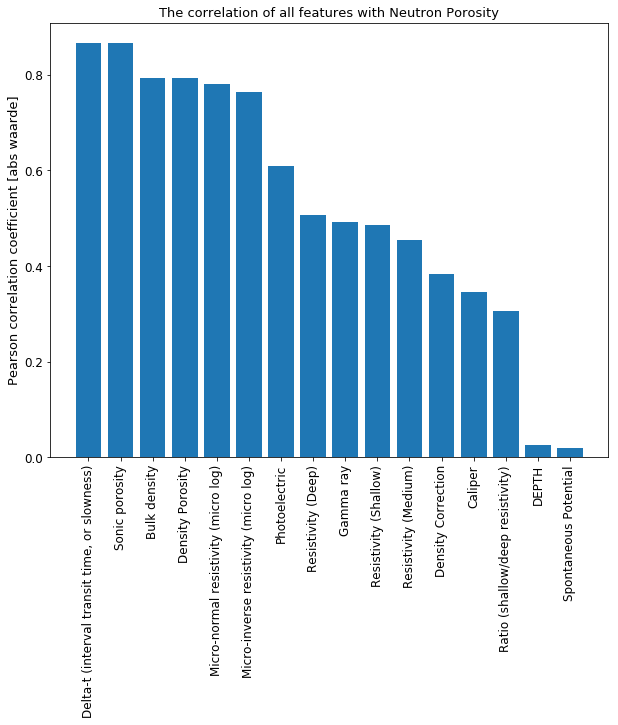

In [68]:
def display_corr_with_col(df, col):
    correlation_matrix = LogDat_train_new.corr()
    correlation_type = correlation_matrix[col].copy()
    abs_correlation_type = correlation_type.apply(lambda x: abs(x))
    desc_corr_values = abs_correlation_type.sort_values(ascending=False)
    y_values = list(desc_corr_values.values)[1:]
    x_values = range(0,len(y_values))
    xlabels = list(desc_corr_values.keys())[1:]
    fig, ax = plt.subplots(figsize=(10,8))
    ax.bar(x_values, y_values)
    ax.set_title('The correlation of all features with {}'.format(col), fontsize=13)
    ax.set_ylabel('Pearson correlation coefficient [abs waarde]', fontsize=13)
    plt.xticks(x_values, xlabels, rotation='vertical')
    plt.show()

display_corr_with_col(LogDat_train_new, 'Neutron Porosity')

Strong relationship of Neutron Porosity with Sonic Porosity/ Delta-t which is a good question if it may not be necessary

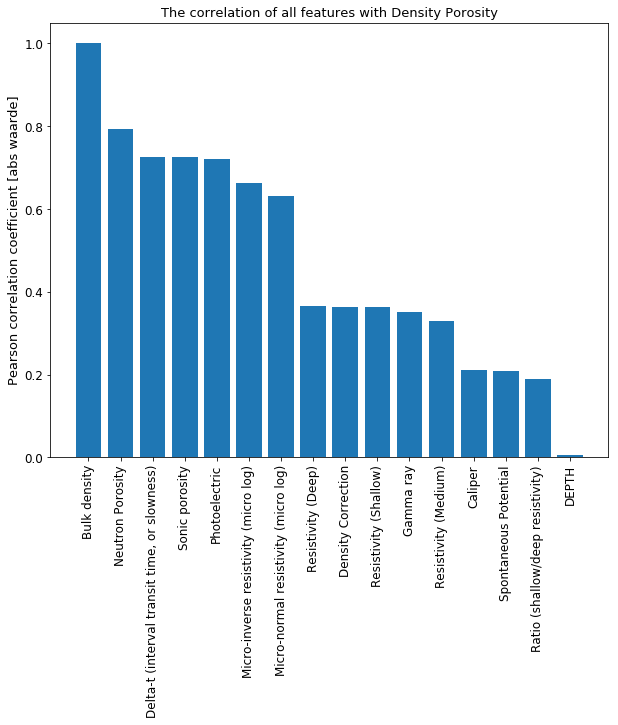

In [69]:
display_corr_with_col(LogDat_train_new, 'Density Porosity')

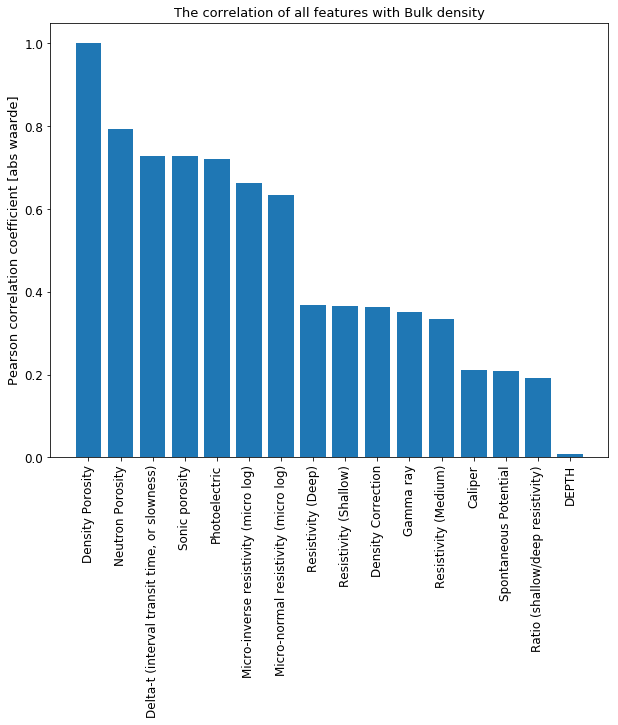

In [70]:
display_corr_with_col(LogDat_train_new, 'Bulk density')

Since, density porosity is very highly related to bulk density we can eliminate either one of them because density porosity is calculated from bulk density after all.

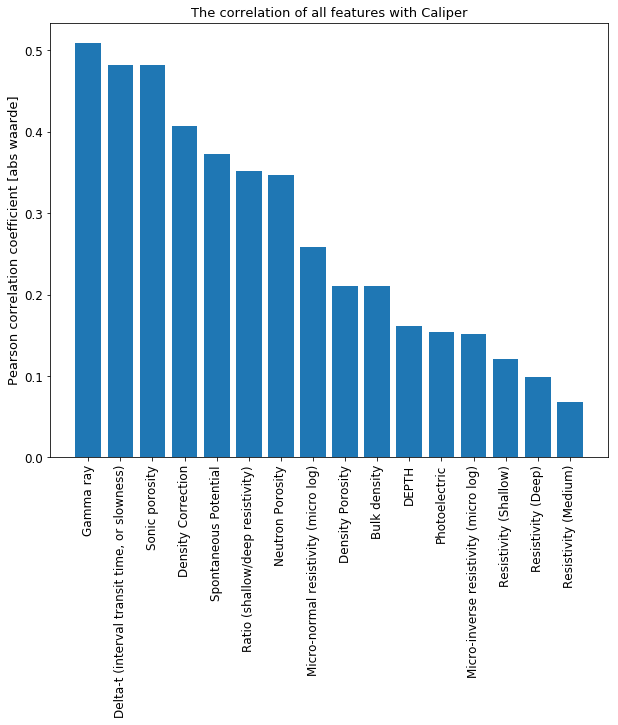

In [71]:
display_corr_with_col(LogDat_train_new, 'Caliper')

Caliper has weak relationships with everyone and maybe or may not be removed.

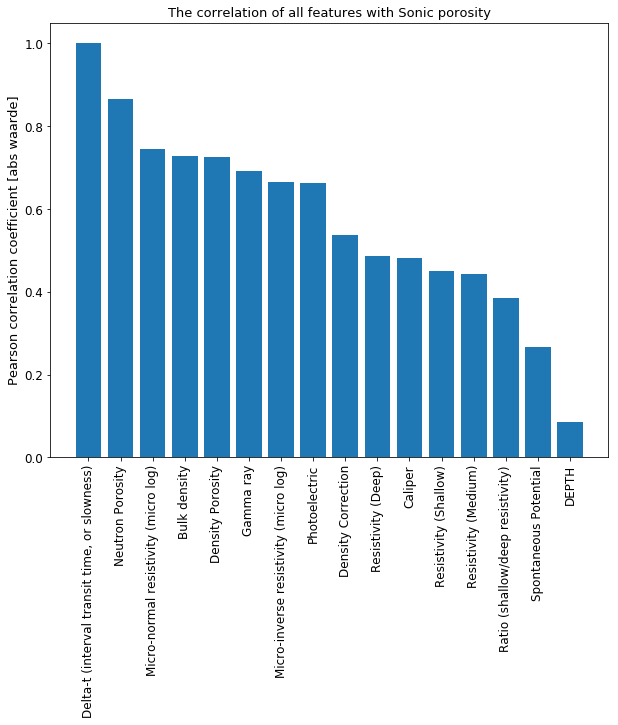

In [72]:
display_corr_with_col(LogDat_train_new, 'Sonic porosity')

Sonic porosity has almost perfectly linear relationship with delta-t and can be removed as sonic porosity is after all calculated from delta-t.

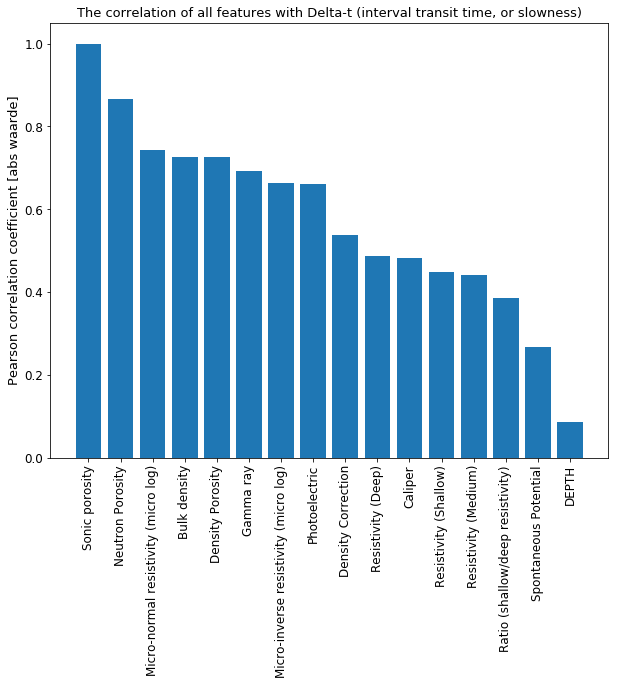

In [73]:
display_corr_with_col(LogDat_train_new, 'Delta-t (interval transit time, or slowness)')

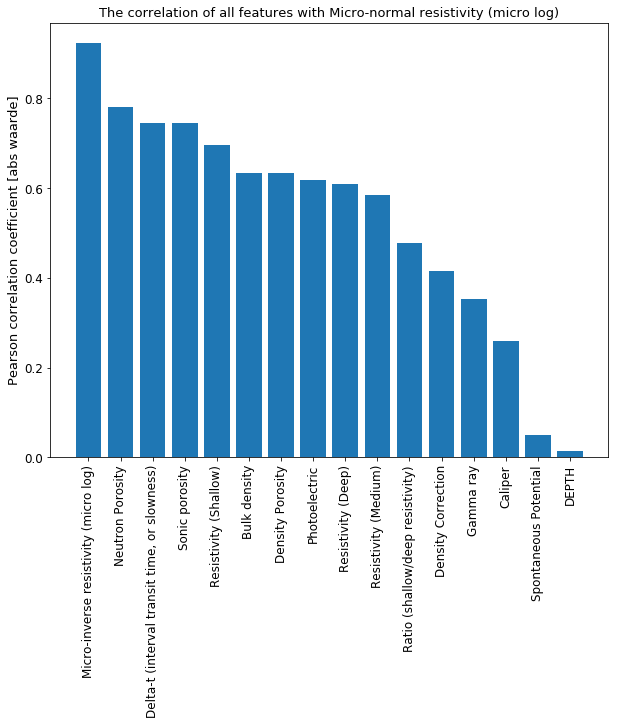

In [74]:
display_corr_with_col(LogDat_train_new, 'Micro-normal resistivity (micro log)')

Micro-normal has perfectly linear relationship with micro-inverse so can also be removed.

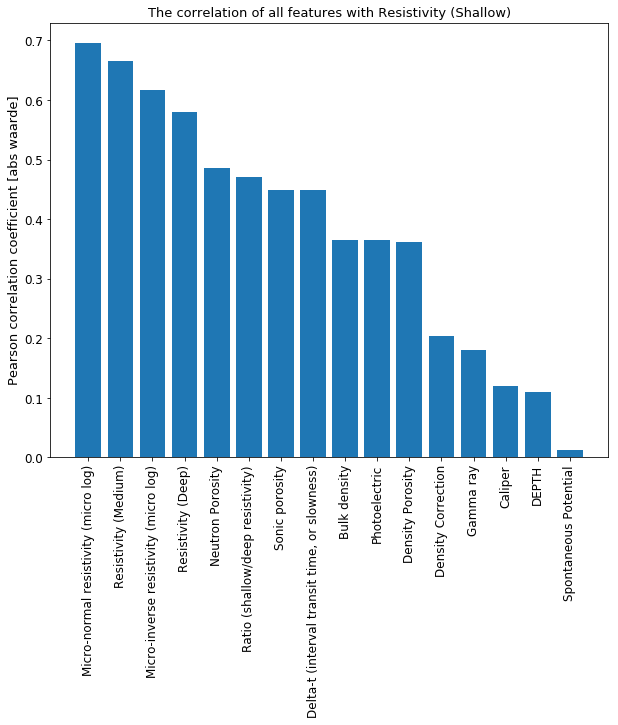

In [75]:
display_corr_with_col(LogDat_train_new, 'Resistivity (Shallow)')

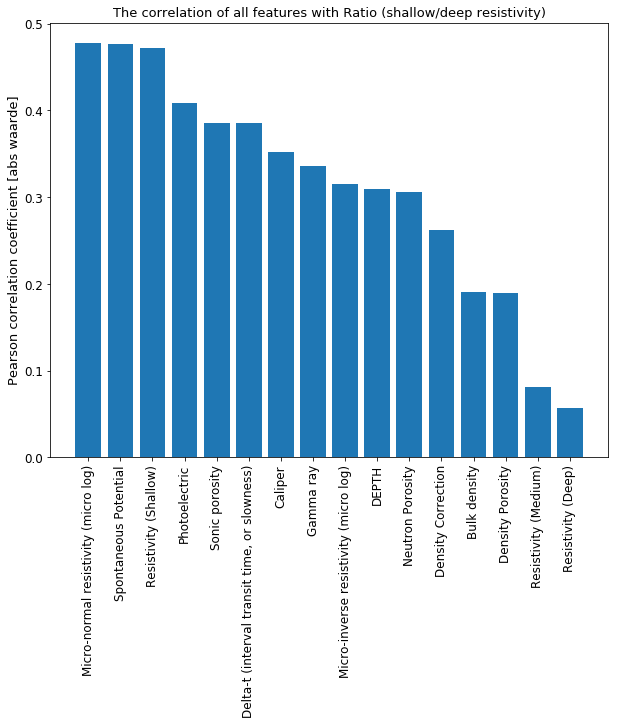

In [76]:
display_corr_with_col(LogDat_train_new, 'Ratio (shallow/deep resistivity)')

Weak relation with everyone like Caliper had and can be dropped.

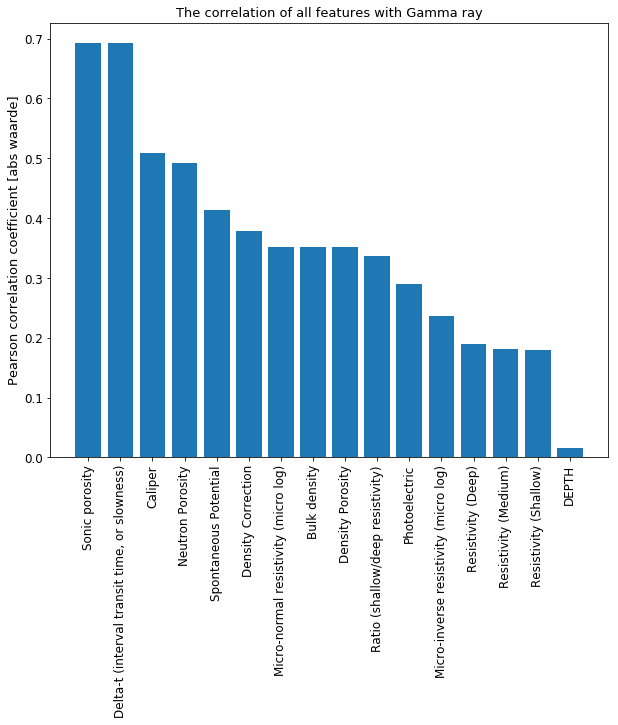

In [77]:
display_corr_with_col(LogDat_train_new, 'Gamma ray')

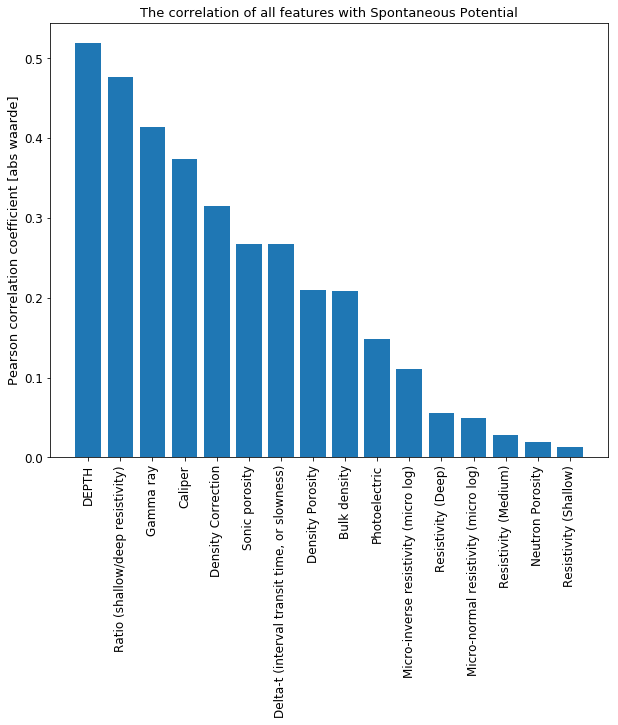

In [78]:
display_corr_with_col(LogDat_train_new, 'Spontaneous Potential')

Weak relationship with everyone and can be dropped.

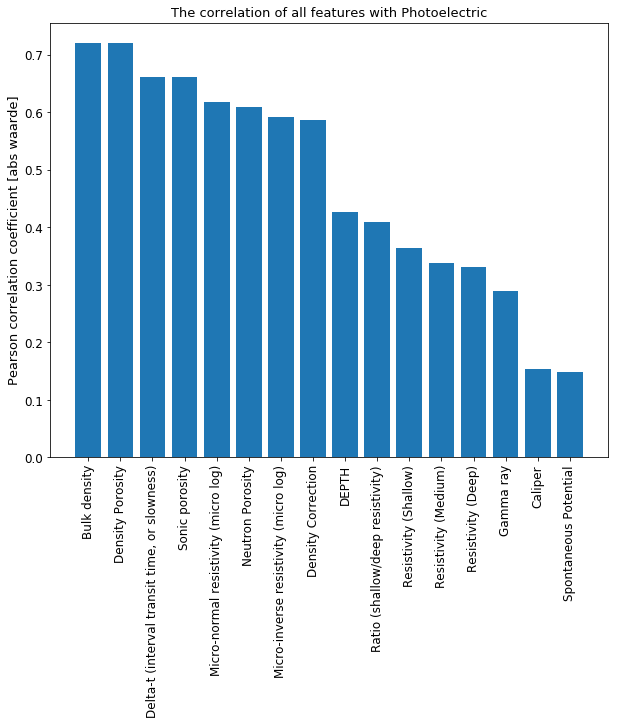

In [79]:
display_corr_with_col(LogDat_train_new, 'Photoelectric')

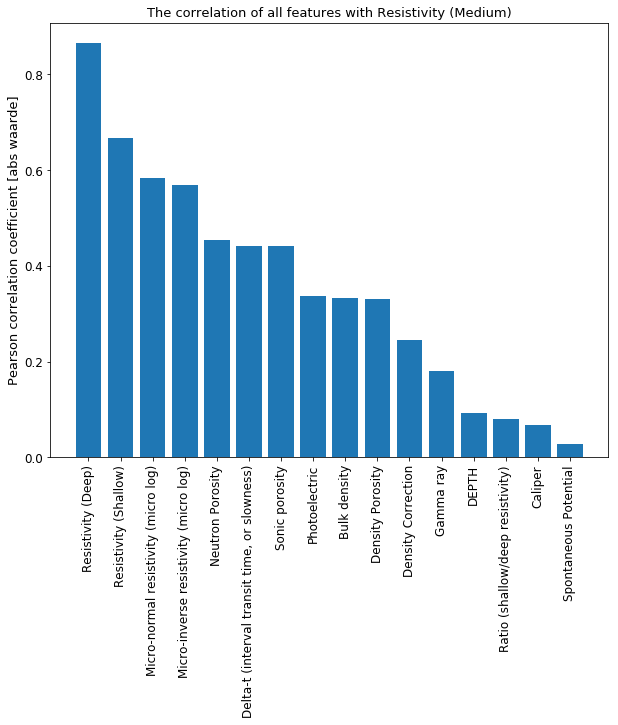

In [80]:
display_corr_with_col(LogDat_train_new, 'Resistivity (Medium)')

Resistivity medium and deep have strong relationship and possibily could be dropped.

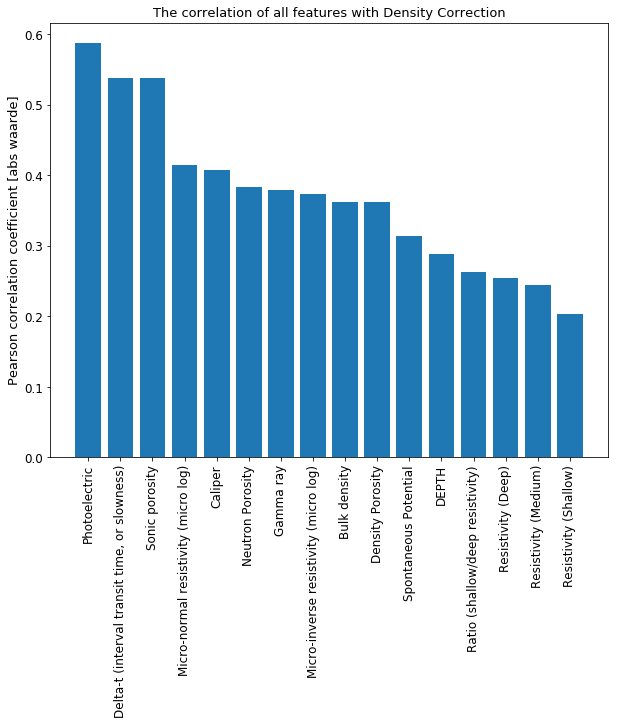

In [81]:
display_corr_with_col(LogDat_train_new, 'Density Correction')

Somewhat weak relationships.

# Training the data 

** LogisticRegression on training set**

In [84]:
from sklearn.linear_model import LogisticRegressionCV

log_reg_n = LogisticRegressionCV(random_state=42)

In [85]:
cross_val_score(log_reg_n, X_train, y_train_sl, cv=5, scoring ="f1_weighted")

array([ 0.72389625,  0.75531066,  0.76169739,  0.73720477,  0.77486259])

In [86]:
y_predLog = log_reg_n.fit(X_train, y_train_sl).predict(X_train)
("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train_sl != y_predLog).sum()))

'Number of mislabeled points out of a total 1390 points : 299'

In [87]:
from sklearn.model_selection import cross_val_predict
y_log_crpred =cross_val_predict(log_reg_n, X_train, y_train_sl, cv=5, method ="predict")

In [88]:
from sklearn.metrics import f1_score

f1_score(y_train_sl, y_log_crpred, average = "weighted")

0.75125598355975243

** RandomForest on training set**

In [89]:
from sklearn.ensemble import RandomForestClassifier

forest_clf_n = RandomForestClassifier(random_state =42)
forest_clf_n.fit(X_train, y_train_sl)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [90]:
cross_val_score(forest_clf_n, X_train, y_train_sl, cv=5, scoring ="f1_weighted")

array([ 0.95980709,  0.92280374,  0.92204216,  0.92467386,  0.9304593 ])

In [91]:
y_predfor_p_n = forest_clf_n.fit(X_train, y_train_sl).predict(X_train)
("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train_sl != y_predfor_p_n).sum()))

'Number of mislabeled points out of a total 1390 points : 4'

**DecisionTree on training set**

In [92]:
from sklearn.tree import DecisionTreeClassifier
tree_clf_n = DecisionTreeClassifier(random_state =42)
tree_clf_n.fit(X_train, y_train_sl)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [93]:
cross_val_score(tree_clf_n, X_train, y_train_sl, cv=5, scoring ="f1_weighted")

array([ 0.94321037,  0.91592645,  0.93032874,  0.91581915,  0.89419589])

In [94]:
y_predtree = tree_clf_n.fit(X_train, y_train_sl).predict(X_train)
("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train_sl != y_predtree).sum()))

'Number of mislabeled points out of a total 1390 points : 0'

**GaussianRBF SVM Classsifier on training set:**

In [95]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = SVC(C=1, probability = True)
rbf_kernel_svm_clf.fit(X_train, y_train_sl)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [96]:
cross_val_score(rbf_kernel_svm_clf, X_train, y_train_sl, cv=5, scoring ="f1_weighted")

array([ 0.89339565,  0.86639757,  0.88002552,  0.85966672,  0.89526028])

In [97]:
y_predsvm = rbf_kernel_svm_clf.fit(X_train, y_train_sl).predict(X_train)
("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train_sl != y_predsvm).sum()))

'Number of mislabeled points out of a total 1390 points : 127'

In [98]:
y_svm_cr = cross_val_predict(rbf_kernel_svm_clf, X_train, y_train_sl, cv =5, method = "predict")

In [99]:
f1_score(y_train_sl, y_svm_cr, average = 'weighted')

0.87894265229034829

**KNeighborsClassifier on training set**:

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf_n = KNeighborsClassifier()
knn_clf_n.fit(X_train, y_train_sl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [101]:
cross_val_score(knn_clf_n, X_train, y_train_sl, cv=5, scoring ="f1_weighted")

array([ 0.91093171,  0.88642074,  0.89976849,  0.88987724,  0.85806555])

In [102]:
y_predknn = knn_clf_n.fit(X_train, y_train_sl).predict(X_train)
("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train_sl != y_predknn).sum()))

'Number of mislabeled points out of a total 1390 points : 85'

**Gaussian Naive Bayes on training set:**

In [103]:
from sklearn.naive_bayes import GaussianNB
gnb_clf_n = GaussianNB()
y_predNB = gnb_clf_n.fit(X_train, y_train_sl)

In [104]:
cross_val_score(gnb_clf_n, X_train, y_train_sl, cv=5, scoring ="f1_weighted")

array([ 0.73777109,  0.74831147,  0.69594624,  0.76289201,  0.70333631])

In [105]:
y_predNB_tr = gnb_clf_n.fit(X_train, y_train_sl).predict(X_train)
("Number of mislabeled points out of a total %d points : %d" % (X_train.shape[0],(y_train_sl != y_predNB_tr).sum()))

'Number of mislabeled points out of a total 1390 points : 395'

In [106]:
y_predgnb_cv = cross_val_predict(gnb_clf_n, X_train, y_train_sl, cv=5, method = "predict")

In [107]:
f1_score(y_train_sl, y_predgnb_cv, average = 'weighted')

0.73014854303607479

**Confusion Matrix and Precision & Recall**

Random Forest:

In [108]:
from sklearn.model_selection import cross_val_predict

y_train_slpred = cross_val_predict(forest_clf_n, X_train, y_train_sl, cv=5)

In [109]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_sl, y_train_slpred)

array([[1034,   23],
       [  69,  264]], dtype=int64)

In [110]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_sl, y_train_slpred, average = 'weighted')

0.93323107581138565

In [111]:
recall_score(y_train_sl, y_train_slpred,average = 'weighted')

0.93381294964028771

In [112]:
from sklearn.metrics import f1_score

f1_score(y_train_sl, y_train_slpred, average = 'weighted')

0.93206239309627548

Decision Tree Classifier:

In [113]:
y_train_slpred2 = cross_val_predict(tree_clf_n, X_train, y_train_sl, cv=5)

In [114]:
confusion_matrix(y_train_sl, y_train_slpred2)

array([[995,  62],
       [ 50, 283]], dtype=int64)

In [115]:
precision_score(y_train_sl, y_train_slpred2,average = 'weighted')

0.92056284824439183

In [116]:
recall_score(y_train_sl, y_train_slpred2,average = 'weighted')

0.91942446043165471

In [117]:

f1_score(y_train_sl, y_train_slpred2, average = 'weighted')

0.91990752152115784

Logisitc Regression:

In [118]:
y_train_slpred3 = cross_val_predict(log_reg_n, X_train, y_train_sl, cv=5)

In [119]:
confusion_matrix(y_train_sl, y_train_slpred3,)

array([[985,  72],
       [235,  98]], dtype=int64)

In [120]:
precision_score(y_train_sl, y_train_slpred3,average = 'weighted')

0.75205917040716497

In [121]:
recall_score(y_train_sl, y_train_slpred3,average = 'weighted')

0.77913669064748203

In [122]:
f1_score(y_train_sl, y_train_slpred3, average = 'weighted')

0.75125598355975243

K-Nearest Neighbor Classifier:

In [123]:
y_train_slpred4 = cross_val_predict(knn_clf_n, X_train, y_train_sl, cv=5)

In [124]:
confusion_matrix(y_train_sl, y_train_slpred4)

array([[995,  62],
       [ 90, 243]], dtype=int64)

In [125]:
precision_score(y_train_sl, y_train_slpred4, average = 'weighted')

0.88822358083918906

In [126]:
recall_score(y_train_sl, y_train_slpred4,average = 'weighted')

0.89064748201438848

In [127]:
f1_score(y_train_sl, y_train_slpred4, average = 'weighted')

0.88896261931999676

GaussianRBF SVM Classifier:

In [128]:
y_train_slpred5 = cross_val_predict(rbf_kernel_svm_clf, X_train, y_train_sl, cv=5)

In [129]:
confusion_matrix(y_train_sl, y_train_slpred5)

array([[1003,   54],
       [ 109,  224]], dtype=int64)

In [130]:
precision_score(y_train_sl, y_train_slpred5, average = 'weighted')

0.87892642720356096

In [131]:
recall_score(y_train_sl, y_train_slpred5, average = 'weighted')

0.88273381294964026

In [132]:
f1_score(y_train_sl, y_train_slpred5, average = 'weighted')

0.87894265229034829

Gaussian Naive Bayes:

In [133]:
y_train_slpred6 = cross_val_predict(gnb_clf_n, X_train, y_train_sl, cv=5)

In [134]:
confusion_matrix(y_train_sl, y_train_slpred6)

array([[774, 283],
       [115, 218]], dtype=int64)

In [135]:
precision_score(y_train_sl, y_train_slpred6, average = 'weighted')

0.76630641735845129

In [136]:
recall_score(y_train_sl, y_train_slpred6,average = 'weighted')

0.71366906474820146

In [137]:
f1_score(y_train_sl, y_train_slpred6, average = 'weighted')

0.73014854303607479

**ROC Curve**

In [138]:
y_logscores = cross_val_predict(log_reg_n, X_train, y_train_sl, cv=5,
                             method="decision_function")

In [139]:
y_logscores

array([[ 0.        , -1.94932337],
       [ 0.        , -5.98268474],
       [ 0.        , -1.88519452],
       ..., 
       [ 0.        , -4.16358693],
       [ 0.        , -4.05007573],
       [ 0.        , -1.55775202]])

In [140]:
y_logscores.shape

(1390, 2)

In [141]:
#hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_logscores.ndim == 2:
    y_logscores = y_logscores[:, 1]

In [142]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_sl, y_logscores)

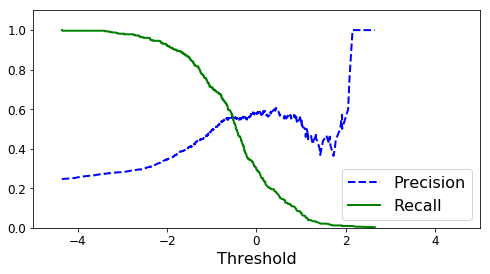

In [144]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower right", fontsize=16)
    plt.ylim([0, 1.1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-5,5])
plt.show()

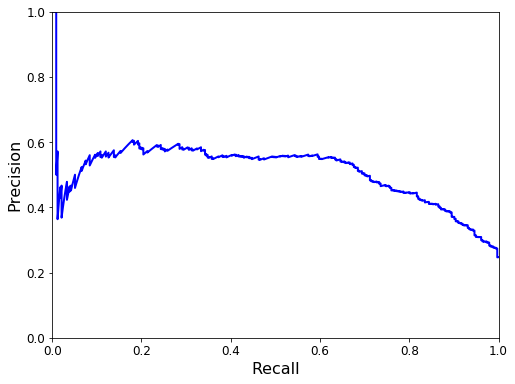

In [145]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [146]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_sl, y_logscores, average = 'weighted')

0.80597248146917022

Random Forest, Decision Tree does not have a decision function but a predict_proba method instead.

In [147]:
from sklearn.ensemble import RandomForestClassifier

roc_forest = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(roc_forest, X_train, y_train_sl, cv =5, method = "predict_proba")

In [148]:
from sklearn.metrics import roc_curve

y_scores_forest = y_probas_forest[:,1] #score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest= roc_curve(y_train_sl, y_scores_forest)

In [149]:
from sklearn.tree import DecisionTreeClassifier

roc_tree= DecisionTreeClassifier(random_state = 42)
y_probas_tree = cross_val_predict(roc_tree, X_train, y_train_sl, cv =5, method = "predict_proba")

In [150]:
roc_auc_score(y_train_sl, y_scores_forest, average ='weighted') #Best ROC-AUC Score for forest

0.97054670564604339

In [151]:
y_scores_tree = y_probas_tree[:,1] #score = proba of positive class
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_train_sl, y_scores_tree)

In [152]:
roc_auc_score(y_train_sl, y_scores_tree, average = 'weighted')

0.8955966373184916

In [153]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_train_sl, y_logscores)

In [154]:
y_probas_gnb = cross_val_predict(gnb_clf_n, X_train, y_train_sl, cv =5, method = "predict_proba")

In [155]:
y_scores_gnb = y_probas_gnb[:,1]
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_train_sl, y_scores_gnb)

In [156]:
roc_auc_score(y_train_sl, y_scores_gnb, average = 'weighted')

0.73798869825359892

In [157]:
y_probas_knn = cross_val_predict(knn_clf_n, X_train, y_train_sl, cv =5, method = "predict_proba")

In [158]:
y_scores_knn = y_probas_knn[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train_sl, y_scores_knn)

In [159]:
roc_auc_score(y_train_sl, y_scores_knn, average = 'weighted')

0.91793449078217293

In [160]:
y_svmscores = cross_val_predict(rbf_kernel_svm_clf, X_train, y_train_sl, cv =5, method = "decision_function")

In [161]:
#hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_svmscores.ndim == 2:
    y_svmscores = y_svmscores[:, 1]

In [162]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train_sl, y_svmscores)

In [163]:
roc_auc_score(y_train_sl, y_svmscores, average = 'weighted')

0.92393339413206976

ROC Curve for Random Forest alone:

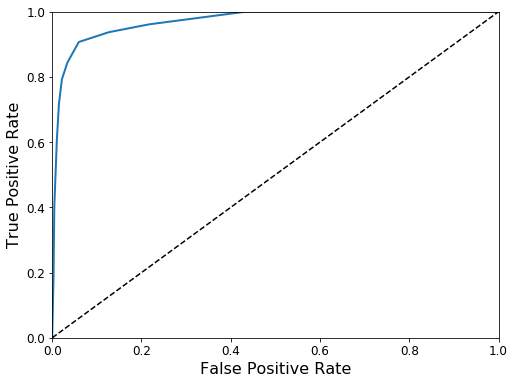

In [164]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

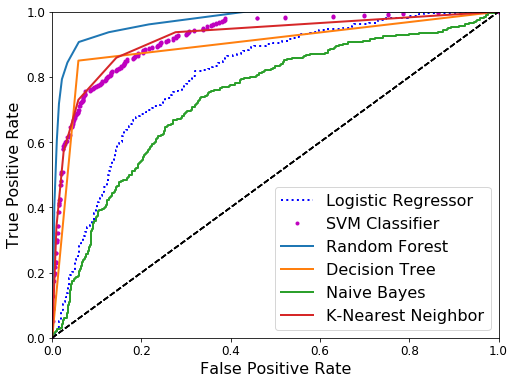

In [165]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, "b:", linewidth=2, label="Logistic Regressor")
plt.plot(fpr_svm, tpr_svm, "m.", linewidth=1, label="SVM Classifier")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plot_roc_curve(fpr_tree, tpr_tree, "Decision Tree")
plot_roc_curve(fpr_gnb, tpr_gnb, "Naive Bayes")
plot_roc_curve(fpr_knn, tpr_knn, "K-Nearest Neighbor")
plt.legend(loc="lower right", fontsize=16)
plt.show()

**Grid search on three best classifiers:**

KNN on shaly limestone formation:

In [166]:
from sklearn.model_selection import GridSearchCV

weights_sl = ['uniform','distance']
numNeighbors_sl = np.array([3,5,7,9])

In [167]:
param_grid_knn_sl  = dict(weights=weights_sl,n_neighbors=numNeighbors_sl)

In [168]:
grid_knn_sl = GridSearchCV(knn_clf_n,param_grid=param_grid_knn_sl,cv=5, n_jobs =-1)

In [169]:
grid_knn_sl.fit(X_train,y_train_sl)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': array([3, 5, 7, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [170]:
grid_knn_sl.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [171]:
grid_knn_sl.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [172]:
knn_clf_sl_GS = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

In [173]:
knn_clf_sl_GS.fit(X_train, y_train_sl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [174]:
y_pred_knn_sl  = cross_val_predict(knn_clf_sl_GS, X_train, y_train_sl, cv=5)
f1_score(y_train_sl, y_pred_knn_sl , average="weighted")

0.90076522893834454

In [175]:
y_test_knn_pred = knn_clf_sl_GS.predict(X_test_prepared)

In [176]:
f1_score(y_test_sl, y_test_knn_pred , average="weighted")

0.91092555406127373

In [177]:
roc_auc_score(y_test_sl, y_test_knn_pred, average = 'weighted')

0.87995686079309776

Comparing without grid search:

In [178]:
y_test_knn_noGS = knn_clf_n.predict(X_test_prepared)

In [179]:
f1_score(y_test_sl, y_test_knn_noGS, average = 'weighted')

0.90498621431611748

In [180]:
roc_auc_score(y_test_sl, y_test_knn_noGS, average = 'weighted')

0.87055126928820303

ROC Curve performance prep for KNN on test set:

In [181]:
y_probas_knn_sl = knn_clf_sl_GS.predict_proba(X_test_prepared)

In [182]:
y_scores_knn_sl = y_probas_knn_sl[:, 1]

In [183]:
from sklearn.metrics import roc_curve

fpr_knn_sl, tpr_knn_sl, thresholds_knn_sl = roc_curve(y_test_sl, y_scores_knn_sl)

Gaussian RBF SVM Grid search:

In [184]:
Cs = [5, 100, 200]
kernels = ['linear', 'rbf']
decision = ['ovo', 'ovr']

In [185]:
param_grid_svm_sl  = dict(C=Cs,kernel = kernels, decision_function_shape =decision)

In [186]:
grid_svm_sl = GridSearchCV(rbf_kernel_svm_clf,param_grid=param_grid_svm_sl,cv=5, n_jobs =-1)

In [187]:
grid_svm_sl.fit(X_train, y_train_sl)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [5, 100, 200], 'kernel': ['linear', 'rbf'], 'decision_function_shape': ['ovo', 'ovr']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [188]:
grid_svm_sl.best_params_

{'C': 100, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

In [189]:
grid_svm_sl.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [190]:
svm_clf_sl_GS = SVC(C= 100, decision_function_shape = 'ovo', random_state =41, probability = True)

In [191]:
svm_clf_sl_GS.fit(X_train, y_train_sl)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=41, shrinking=True,
  tol=0.001, verbose=False)

In [192]:
y_pred_svm_sl  = cross_val_predict(svm_clf_sl_GS, X_train, y_train_sl, cv=5, n_jobs=-1)
f1_score(y_train_sl, y_pred_svm_sl , average="weighted")

0.92902906979407762

In [193]:
y_test_svm_pred = svm_clf_sl_GS.predict(X_test_prepared)

In [194]:
f1_score(y_test_sl, y_test_svm_pred , average="weighted")

0.93652014192326571

In [195]:
roc_auc_score(y_test_sl, y_test_svm_pred, average = 'weighted')

0.92164426746308281

Comparing with previous version before Grid Search:

In [196]:
rbf_kernel_svm_clf.fit(X_train, y_train_sl)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [197]:
y_test_svm_noGS = rbf_kernel_svm_clf.predict(X_test_prepared)

In [198]:
f1_score(y_test_sl, y_test_svm_noGS , average="weighted")

0.88354820395494993

In [199]:
roc_auc_score(y_test_sl, y_test_svm_noGS, average = 'weighted')

0.8271113323378132

ROC Curve preparation for SVM Classifier on Shaly Limestone:

In [200]:
y_probas_svm_sl = rbf_kernel_svm_clf.predict_proba(X_test_prepared)

In [201]:
y_scores_svm_sl = y_probas_svm_sl[:, 1] # score = proba of positive class
fpr_svm_sl, tpr_svm_sl, thresholds_svm_sl = roc_curve(y_test_sl,y_scores_svm_sl)

RandomForest on shaly limestone grid search

In [202]:
numEstim_for_sl = [200, 400, 500]
criteria_for_sl = ['gini', 'entropy']

In [203]:
param_grid_for_sl  = dict(n_estimators = numEstim_for_sl, criterion = criteria_for_sl)

In [204]:
grid_for_sl = GridSearchCV(forest_clf_n,param_grid=param_grid_for_sl,cv=5, n_jobs =-1)

In [205]:
grid_for_sl.fit(X_train, y_train_sl)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [200, 400, 500], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [206]:
grid_for_sl.best_params_

{'criterion': 'gini', 'n_estimators': 500}

In [207]:
grid_for_sl.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [210]:
for_clf_sl_GS = RandomForestClassifier(n_estimators = 500, random_state =42)

In [211]:
for_clf_sl_GS.fit(X_train, y_train_sl)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [212]:
y_pred_for_sl  = cross_val_predict(for_clf_sl_GS, X_train, y_train_sl, cv=5, n_jobs=-1)
f1_score(y_train_sl, y_pred_for_sl , average="weighted")

0.94498612769060919

In [213]:
y_test_for_pred = for_clf_sl_GS.predict(X_test_prepared)

In [214]:
f1_score(y_test_sl, y_test_for_pred , average="weighted")

0.95460353713498058

In [215]:
roc_auc_score(y_test_sl, y_test_for_pred, average = 'weighted')

0.92324124771859972

Comparing without GridSearch:

In [216]:
y_test_for_noGS= forest_clf_n.predict(X_test_prepared)

In [217]:
f1_score(y_test_sl, y_test_for_noGS, average="weighted")

0.95636735796639238

In [218]:
roc_auc_score(y_test_sl, y_test_for_noGS, average = 'weighted')

0.92172722747635638

ROC Curve prepration of Random Forest on Shaly Limestone:

In [219]:
y_probas_forest_sl = for_clf_sl_GS.predict_proba(X_test_prepared)

In [220]:
y_scores_forest_sl = y_probas_forest_sl[:, 1] # score = proba of positive class
fpr_forest_sl, tpr_forest_sl, thresholds_forest_sl = roc_curve(y_test_sl,y_scores_forest_sl)

Voting on best classifiers after GridSearch:

In [221]:
from sklearn.ensemble import VotingClassifier

voting_clf_sl = VotingClassifier(estimators = [('svmGS', svm_clf_sl_GS),
                                               ('knnGSsl', knn_clf_sl_GS),
                                               ('rnfGS', for_clf_sl_GS)], voting = 'soft')

In [222]:
voting_clf_sl.fit(X_train, y_train_sl)

VotingClassifier(estimators=[('svmGS', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=41, shrinking=True,
  tol=0.001, verbose=False)), ('knnGSsl', KNeighborsClassifier(algorithm='auto', lea...timators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [223]:
y_pred_voting_sl  = cross_val_predict(voting_clf_sl, X_train, y_train_sl, cv=5, n_jobs=-1)
f1_score(y_train_sl, y_pred_voting_sl , average="weighted")

0.93531625139763241

In [224]:
y_test_voting_pred = voting_clf_sl.predict(X_test_prepared)

In [225]:
f1_score(y_test_sl, y_test_voting_pred , average="weighted")

0.95138816147323446

In [226]:
roc_auc_score(y_test_sl, y_test_voting_pred)

0.93184834909573577

ROC Curve of Shaly Limestone of three best classifiers on test set:

In [227]:
y_probas_voting_sl = voting_clf_sl.predict_proba(X_test_prepared)

In [228]:
y_scores_voting_sl = y_probas_voting_sl[:, 1] # score = proba of positive class
fpr_voting_sl, tpr_voting_sl, thresholds_voting_sl = roc_curve(y_test_sl,y_scores_voting_sl)

ROC Curves on Test Set:

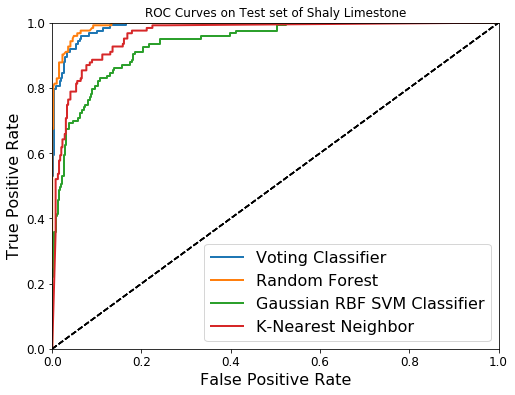

In [229]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_voting_sl, tpr_voting_sl, "Voting Classifier")
plot_roc_curve(fpr_forest_sl, tpr_forest_sl, "Random Forest")
plot_roc_curve(fpr_svm_sl, tpr_svm_sl, "Gaussian RBF SVM Classifier")
plot_roc_curve(fpr_knn_sl, tpr_knn_sl, "K-Nearest Neighbor")
plt.legend(loc="lower right", fontsize=16)
plt.title("ROC Curves on Test set of Shaly Limestone")
plt.show()

**Grid Search Feature importances with Shaly Limestone:**

In [208]:
feature_importances_for = grid_for_sl.best_estimator_.feature_importances_

In [209]:
attributes = ["Depth", "Neutron Porosity", "Caliper", "Density Porosity", "Gamma Ray", "Photoelctric",
             "Bulk Density", "Density Correction", "Resistivity (Deep)", "Resistivity (Medium)", "Resistivity (Shallow)",
             "Ratio(Shallow/Deep resistivity)", "SP", "Micro-inverse (resistivity) micro-log", 
              "Micro-normal (resistivity) micro-log", "Delta-t (transit time)", "Sonic Porosity"]
sorted(zip(feature_importances_for*100, attributes), reverse=True)

[(32.698676805752939, 'Depth'),
 (11.437112671467331, 'Gamma Ray'),
 (7.0256677233376346, 'SP'),
 (5.2919610063076963, 'Density Correction'),
 (4.69972333501756, 'Resistivity (Deep)'),
 (4.3250282898616081, 'Caliper'),
 (3.876972448849632, 'Micro-normal (resistivity) micro-log'),
 (3.8373287915693957, 'Resistivity (Medium)'),
 (3.6854852718774076, 'Photoelctric'),
 (3.6552972972995796, 'Sonic Porosity'),
 (3.5872666770164936, 'Micro-inverse (resistivity) micro-log'),
 (3.5667515140079744, 'Delta-t (transit time)'),
 (2.7913023534006003, 'Resistivity (Shallow)'),
 (2.714697087901786, 'Neutron Porosity'),
 (2.4667204236786993, 'Ratio(Shallow/Deep resistivity)'),
 (2.1928475922610642, 'Density Porosity'),
 (2.1471607103925967, 'Bulk Density')]

**Performance on the rest of the classes:**

Making new test and training sets for rest of classes first:

In [230]:
y_train.head()

,Type of Formation_dolomite,Type of Formation_limestone,Type of Formation_sandstone,Type of Formation_sandy limestone,Type of Formation_shale,Type of Formation_shaly limestone,Type of Formation_shaly sandstone
364,0,1,0,0,0,0,0
1119,0,1,0,0,0,0,0
974,0,0,0,1,0,0,0
481,0,0,0,0,1,0,0
828,0,1,0,0,0,0,0


In [231]:
y_train_lim = y_train['Type of Formation_limestone']
y_train_lim.head()

364     1
1119    1
974     0
481     0
828     1
Name: Type of Formation_limestone, dtype: uint8

In [232]:
y_train_sand = y_train['Type of Formation_sandstone']
y_train_sand.head()

364     0
1119    0
974     0
481     0
828     0
Name: Type of Formation_sandstone, dtype: uint8

In [233]:
y_train_dol = y_train['Type of Formation_dolomite']
y_train_dol.head()

364     0
1119    0
974     0
481     0
828     0
Name: Type of Formation_dolomite, dtype: uint8

In [234]:
y_train_lim = y_train['Type of Formation_limestone']
y_train_lim.head()

364     1
1119    1
974     0
481     0
828     1
Name: Type of Formation_limestone, dtype: uint8

In [235]:
y_train_sandlim = y_train['Type of Formation_sandy limestone']
y_train_sandlim.head()

364     0
1119    0
974     1
481     0
828     0
Name: Type of Formation_sandy limestone, dtype: uint8

In [236]:
y_train_shale = y_train['Type of Formation_shale']
y_train_shale.head()

364     0
1119    0
974     0
481     1
828     0
Name: Type of Formation_shale, dtype: uint8

In [237]:
y_train_ss = y_train['Type of Formation_shaly sandstone']
y_train_ss.head()

364     0
1119    0
974     0
481     0
828     0
Name: Type of Formation_shaly sandstone, dtype: uint8

In [238]:
y_test_new.head()

,Type of Formation_dolomite,Type of Formation_limestone,Type of Formation_sandstone,Type of Formation_sandy limestone,Type of Formation_shale,Type of Formation_shaly limestone,Type of Formation_shaly sandstone
1501,0,1,0,0,0,0,0
377,0,1,0,0,0,0,0
1025,0,0,0,0,1,0,0
819,0,1,0,0,0,0,0
1364,0,0,0,0,1,0,0


In [239]:
y_test_sand = y_test_new['Type of Formation_sandstone']
y_test_sand.head()

1501    0
377     0
1025    0
819     0
1364    0
Name: Type of Formation_sandstone, dtype: uint8

In [240]:
y_test_dol = y_test_new['Type of Formation_dolomite']
y_test_dol.head()

1501    0
377     0
1025    0
819     0
1364    0
Name: Type of Formation_dolomite, dtype: uint8

In [241]:
y_test_lim = y_test_new['Type of Formation_limestone']
y_test_lim.head()

1501    1
377     1
1025    0
819     1
1364    0
Name: Type of Formation_limestone, dtype: uint8

In [242]:
y_test_sandlim = y_test_new['Type of Formation_sandy limestone']
y_test_sandlim.head()

1501    0
377     0
1025    0
819     0
1364    0
Name: Type of Formation_sandy limestone, dtype: uint8

In [243]:
y_test_shale = y_test_new['Type of Formation_shale']
y_test_shale.head()

1501    0
377     0
1025    1
819     0
1364    1
Name: Type of Formation_shale, dtype: uint8

In [244]:
y_test_ss = y_test_new['Type of Formation_shaly sandstone']
y_test_ss.head()

1501    0
377     0
1025    0
819     0
1364    0
Name: Type of Formation_shaly sandstone, dtype: uint8

**Feature importances on rest of the classes:**

In [354]:
y_trains_classes= (y_train_sl, y_train_lim, y_train_shale, y_train_sandlim, 
                   y_train_ss, y_train_dol, y_train_sand)
y_classes_names = ("shaly limestone", "limestone", "shale", "sandy lime", 
                   "shaly sandstone", "dolomite", "sandstone")
y_test_classes = (y_test_sl, y_test_lim, y_test_shale, y_test_sandlim, y_test_ss, y_test_dol, y_test_sand)

In [355]:
numEstim_for = [200, 400, 500]
criteria_for = ['gini', 'entropy']
param_grid_for  = dict(n_estimators = numEstim_for, criterion = criteria_for)
for_clf_fi = RandomForestClassifier(random_state =42)
attributes_all = ["Depth" ,"Neutron Porosity","Caliper ", "Density Porosity","Gamma Ray",
                      "Photoelectric", "Bulk Density", "Density Correction", "Resistivity (Deep)", 
                       "Resistivity (Medium)", "Resistivity (Shallow)","Ratio(Shallow/Deep resistivity)",
                      "SP",  "Micro-inverse (resistivity) micro-log", "Micro-normal (resistivity) micro-log", 
                    "Delta-t (transit time)", "Sonic Porosity"] 

**Feature importances of limestone:**

In [356]:
grid_for_lim = GridSearchCV(for_clf_fi,param_grid=param_grid_for,cv=5, n_jobs =-1)
grid_for_lim.fit(X_train, y_train_lim)
feature_importances_lim = grid_for_lim.best_estimator_.feature_importances_
sorted(zip(feature_importances_lim*100, attributes_all), reverse=True)

[(20.490873610563774, 'Depth'),
 (12.09548368712561, 'Photoelectric'),
 (7.5876354108716608, 'Gamma Ray'),
 (7.199221662111591, 'Sonic Porosity'),
 (5.9924574197004841, 'SP'),
 (5.6892619027191973, 'Density Correction'),
 (5.4727581603199775, 'Delta-t (transit time)'),
 (4.037953279469467, 'Neutron Porosity'),
 (3.9772708914231534, 'Resistivity (Deep)'),
 (3.9157159352337554, 'Bulk Density'),
 (3.8785590650677042, 'Resistivity (Medium)'),
 (3.8378661049938105, 'Density Porosity'),
 (3.8082657018084038, 'Micro-inverse (resistivity) micro-log'),
 (3.4521001554844304, 'Micro-normal (resistivity) micro-log'),
 (3.2643772249487251, 'Caliper '),
 (2.6545476810977231, 'Resistivity (Shallow)'),
 (2.645652107060513, 'Ratio(Shallow/Deep resistivity)')]

**Feature importances of shale:**

In [357]:
grid_for_shale = GridSearchCV(for_clf_fi,param_grid=param_grid_for,cv=5, n_jobs =-1)
grid_for_shale.fit(X_train, y_train_shale)
feature_importances_shale = grid_for_shale.best_estimator_.feature_importances_
sorted(zip(feature_importances_shale*100, attributes_all), reverse=True)

[(20.950655660649275, 'Gamma Ray'),
 (8.7649983045863511, 'Depth'),
 (7.8745311068874013, 'SP'),
 (7.544206710447952, 'Sonic Porosity'),
 (6.632776920956335, 'Delta-t (transit time)'),
 (6.1290876680814366, 'Density Correction'),
 (5.1297756155294962, 'Caliper '),
 (4.7669950717085996, 'Micro-normal (resistivity) micro-log'),
 (4.6914561836071549, 'Resistivity (Deep)'),
 (4.6769052063688381, 'Resistivity (Medium)'),
 (3.9460133944234212, 'Micro-inverse (resistivity) micro-log'),
 (3.417788758909404, 'Ratio(Shallow/Deep resistivity)'),
 (3.2810824051178686, 'Photoelectric'),
 (3.2502028490509072, 'Neutron Porosity'),
 (3.1743094666705343, 'Resistivity (Shallow)'),
 (2.8865801898158385, 'Density Porosity'),
 (2.8826344871891747, 'Bulk Density')]

**Feature importances of Sandy-Limestone:**

In [358]:
grid_for_sandlim = GridSearchCV(for_clf_fi,param_grid=param_grid_for,cv=5, n_jobs =-1)
grid_for_sandlim.fit(X_train, y_train_sandlim)
feature_importances_sandlim = grid_for_sandlim.best_estimator_.feature_importances_
sorted(zip(feature_importances_sandlim*100, attributes_all), reverse=True)

[(14.707880882714836, 'Resistivity (Shallow)'),
 (13.364730255845391, 'Bulk Density'),
 (11.461630168056711, 'Resistivity (Deep)'),
 (11.340180227209865, 'Density Porosity'),
 (9.2415438757067445, 'Resistivity (Medium)'),
 (8.8391414847332239, 'Neutron Porosity'),
 (5.7003725884107324, 'Sonic Porosity'),
 (5.5837958853639584, 'Delta-t (transit time)'),
 (4.1046578990570186, 'Micro-normal (resistivity) micro-log'),
 (3.2183081956192647, 'SP'),
 (2.6933720135368087, 'Depth'),
 (2.4151182886140723, 'Micro-inverse (resistivity) micro-log'),
 (2.3275541139553777, 'Ratio(Shallow/Deep resistivity)'),
 (1.9521452493236229, 'Photoelectric'),
 (1.7586431580477573, 'Gamma Ray'),
 (0.94090848517096937, 'Density Correction'),
 (0.35001722863365575, 'Caliper ')]

**Feature importances of Shaly Sandstone:**

In [359]:
grid_for_ss = GridSearchCV(for_clf_fi,param_grid=param_grid_for,cv=4, n_jobs =-1)
grid_for_ss.fit(X_train, y_train_ss)
feature_importances_ss = grid_for_ss.best_estimator_.feature_importances_
sorted(zip(feature_importances_ss*100, attributes_all), reverse=True)

[(21.596809649545197, 'Depth'),
 (15.914938857340951, 'Photoelectric'),
 (7.1646710110631329, 'Bulk Density'),
 (7.136841528247909, 'SP'),
 (6.1458162965539538, 'Density Correction'),
 (5.9321190717924184, 'Density Porosity'),
 (5.7715629320794433, 'Ratio(Shallow/Deep resistivity)'),
 (5.0460116670441417, 'Gamma Ray'),
 (4.0500786800342006, 'Caliper '),
 (3.2224969769496266, 'Micro-normal (resistivity) micro-log'),
 (3.1413058863587016, 'Resistivity (Deep)'),
 (3.0305749558090955, 'Neutron Porosity'),
 (2.8731256647119627, 'Resistivity (Medium)'),
 (2.5257474251301901, 'Sonic Porosity'),
 (1.9758618619006039, 'Delta-t (transit time)'),
 (1.5080152949014241, 'Micro-inverse (resistivity) micro-log'),
 (1.4640222405370318, 'Resistivity (Shallow)')]

**Feature importances of Dolomite:**

In [360]:
grid_for_dol = GridSearchCV(for_clf_fi,param_grid=param_grid_for,cv=5, n_jobs =-1)
grid_for_dol.fit(X_train, y_train_dol)
feature_importances_dol = grid_for_dol.best_estimator_.feature_importances_
sorted(zip(feature_importances_dol*100, attributes_all), reverse=True)

[(53.509366629544509, 'Depth'),
 (11.949567088220114, 'Caliper '),
 (6.1893849633695854, 'SP'),
 (5.9758459514743212, 'Gamma Ray'),
 (3.9081768771959293, 'Photoelectric'),
 (3.5748245958727347, 'Neutron Porosity'),
 (2.0693306345007256, 'Resistivity (Deep)'),
 (2.0206560970330965, 'Ratio(Shallow/Deep resistivity)'),
 (1.9364464930680714, 'Density Porosity'),
 (1.8154415745453487, 'Bulk Density'),
 (1.6393981485793421, 'Density Correction'),
 (1.5617315647734751, 'Resistivity (Medium)'),
 (1.1101369349903425, 'Delta-t (transit time)'),
 (0.7678410807304582, 'Resistivity (Shallow)'),
 (0.75319282785050801, 'Sonic Porosity'),
 (0.68842656439892325, 'Micro-normal (resistivity) micro-log'),
 (0.53023197385250531, 'Micro-inverse (resistivity) micro-log')]

**Feature importances of Sandstone:**

In [361]:
grid_for_sand = GridSearchCV(for_clf_fi,param_grid=param_grid_for,cv=5, n_jobs =-1)
grid_for_sand.fit(X_train, y_train_sand)
feature_importances_sand = grid_for_sand.best_estimator_.feature_importances_
sorted(zip(feature_importances_sand*100, attributes_all), reverse=True)

[(36.309046019421423, 'Photoelectric'),
 (16.988444654943709, 'Depth'),
 (10.625009294149367, 'Gamma Ray'),
 (7.0372921222701041, 'Bulk Density'),
 (6.2082456104717005, 'Neutron Porosity'),
 (6.1994382438241598, 'Density Porosity'),
 (2.3100252234031458, 'Caliper '),
 (2.1072911414102631, 'Delta-t (transit time)'),
 (1.9954540514952033, 'Sonic Porosity'),
 (1.994056257803549, 'Resistivity (Deep)'),
 (1.8722947450454466, 'SP'),
 (1.5215307078817599, 'Density Correction'),
 (1.1586896609418966, 'Resistivity (Medium)'),
 (1.0650840258643131, 'Resistivity (Shallow)'),
 (0.98184477645290591, 'Ratio(Shallow/Deep resistivity)'),
 (0.92377160122838375, 'Micro-normal (resistivity) micro-log'),
 (0.70248186339264063, 'Micro-inverse (resistivity) micro-log')]

**Automation for training all classes with all classifiers applied uptil now:**

In [280]:
from sklearn.svm import SVC

svm_clf_GS = SVC(C= 100, decision_function_shape = 'ovo', random_state =41, probability = True)

for y_train_all, y_test_all, y_strings_all in zip(y_trains_classes, 
                                                    y_test_classes, y_classes_names):
    svm_clf_GS.fit(X_train, y_train_all)
    y_cv_svm = cross_val_score(svm_clf_GS, X_train, y_train_all, cv = 4)
    print("\n","cross-validation score on training set for", y_strings_all, "with SVMClassifier =", y_cv_svm )
    
    y_cvp_svm = cross_val_predict(svm_clf_GS, X_train, y_train_all, cv=4)
    f1_cvp_train_svm = f1_score(y_train_all, y_cvp_svm, average = 'weighted', labels = np.unique(y_cvp_svm))
    print("f1 scores of cross validation prediction training set for", y_strings_all, "with SVMClassifier =", f1_cvp_train_svm)
    roc_auc_score_svm_train = roc_auc_score(y_train_all, y_cvp_svm, average = 'weighted')
    print("roc auc score on cross validation prediction training set for", 
          y_strings_all,"with SVMClassifier =", roc_auc_score_svm_train)


    y_cvp_svm_test = svm_clf_GS.predict(X_test_prepared)
    f1_svm_test_all = f1_score(y_test_all, y_cvp_svm_test, average = 'weighted', labels = np.unique(y_cvp_svm_test))
    print("f1 score of actual prediction on test set of", y_strings_all, 
          "with SVMClassifier =", f1_svm_test_all)
    roc_auc_score_svm_test_all = roc_auc_score(y_test_all, y_cvp_svm_test, average = 'weighted')
    print("roc auc score of actual prediction on test set of",y_strings_all, "with SVMClassifier =",
          roc_auc_score_svm_test_all)


 cross-validation score on training set for shaly limestone with SVMClassifier = [ 0.93696275  0.91930836  0.92507205  0.91642651]
f1 scores of cross validation prediction training set for shaly limestone with SVMClassifier = 0.924499183061
roc auc score on cross validation prediction training set for shaly limestone with SVMClassifier = 0.896850966387
f1 score of actual prediction on test set of shaly limestone with SVMClassifier = 0.936520141923
roc auc score of actual prediction on test set of shaly limestone with SVMClassifier = 0.921644267463

 cross-validation score on training set for limestone with SVMClassifier = [ 0.91091954  0.89942529  0.93371758  0.91642651]
f1 scores of cross validation prediction training set for limestone with SVMClassifier = 0.915092443713
roc auc score on cross validation prediction training set for limestone with SVMClassifier = 0.915056644086
f1 score of actual prediction on test set of limestone with SVMClassifier = 0.939770401009
roc auc score of

In [281]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf_GS = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

for y_train_all, y_test_all, y_strings_all in zip(y_trains_classes, 
                                                  y_test_classes, y_classes_names):
    knn_clf_GS.fit(X_train, y_train_all)
    y_cv_knn = cross_val_score(knn_clf_GS, X_train, y_train_all, cv = 4)
    print("\n","cross-validation score on training set for", y_strings_all, "with KNeighbor Classifier =", y_cv_knn)
    
    y_cvp_knn = cross_val_predict(knn_clf_GS, X_train, y_train_all, cv=4)
    f1_cvp_train_knn = f1_score(y_train_all, y_cvp_knn, average = 'weighted', labels = np.unique(y_cvp_knn))
    print("f1 scores of cross validation prediction training set for", y_strings_all, 
          "with KNeighbor Classifier =", f1_cvp_train_knn)
    roc_auc_score_knn_train = roc_auc_score(y_train_all, y_cvp_knn, average = 'weighted')
    print("roc auc score on cross validation prediction training set for", 
          y_strings_all,"with KNeighbors Classifier =", roc_auc_score_knn_train)


    y_cvp_knn_test = knn_clf_GS.predict(X_test_prepared)
    f1_knn_test_all = f1_score(y_test_all, y_cvp_knn_test, average = 'weighted', labels = np.unique(y_cvp_knn_test))
    print("f1 score of actual prediction on test set of", y_strings_all, 
          "with KNeighbors Classifier =", f1_knn_test_all)
    roc_auc_score_knn_test_all = roc_auc_score(y_test_all, y_cvp_knn_test, average = 'weighted')
    print("roc auc score of actual prediction on test set of",y_strings_all, "with KNeighbors Classifier =",
          roc_auc_score_knn_test_all)


 cross-validation score on training set for shaly limestone with KNeighbor Classifier = [ 0.91404011  0.88760807  0.91066282  0.88184438]
f1 scores of cross validation prediction training set for shaly limestone with KNeighbor Classifier = 0.897175808047
roc auc score on cross validation prediction training set for shaly limestone with KNeighbors Classifier = 0.847939235356
f1 score of actual prediction on test set of shaly limestone with KNeighbors Classifier = 0.910925554061
roc auc score of actual prediction on test set of shaly limestone with KNeighbors Classifier = 0.879956860793

 cross-validation score on training set for limestone with KNeighbor Classifier = [ 0.90517241  0.88505747  0.91066282  0.88472622]
f1 scores of cross validation prediction training set for limestone with KNeighbor Classifier = 0.896374986099
roc auc score on cross validation prediction training set for limestone with KNeighbors Classifier = 0.896338837637
f1 score of actual prediction on test set of li

In [282]:
from sklearn.ensemble import RandomForestClassifier

for_clf_GS = RandomForestClassifier(n_estimators = 500, random_state =42)

for y_train_all, y_test_all, y_strings_all in zip(y_trains_classes, 
                                                     y_test_classes, y_classes_names):
    for_clf_GS.fit(X_train, y_train_all)
    y_cv_randfor = cross_val_score(for_clf_GS, X_train, y_train_all, cv = 4)
    print("\n","cross-validation score on training set for", y_strings_all, "with RandomForestClassifier =", y_cv_randfor )
    
    y_cvp_randfor = cross_val_predict(for_clf_GS, X_train, y_train_all, cv=4)
    f1_cvp_train = f1_score(y_train_all, y_cvp_randfor, average = 'weighted', labels = np.unique(y_cvp_randfor))
    print("f1 scores of cross validation prediction training set for", y_strings_all, "=", f1_cvp_train)
    roc_auc_score_randfor_train = roc_auc_score(y_train_all, y_cvp_randfor, average = 'weighted')
    print("roc auc score on cross validation prediction training set for", 
          y_strings_all,"with RandomForestClassifier =", roc_auc_score_randfor_train)


    y_cvp_randfor_test = for_clf_GS.predict(X_test_prepared)
    f1_for_test_all = f1_score(y_test_all, y_cvp_randfor_test, average = 'weighted', labels = np.unique(y_cvp_randfor_test))
    print("f1 score of actual prediction on test set of", y_strings_all, 
          "with RandomForestClassifier =", f1_for_test_all)
    roc_auc_score_randfor_test_all = roc_auc_score(y_test_all, y_cvp_randfor_test, average = 'weighted')
    print("roc auc score of actual prediction on test set of",y_strings_all, "with RandomForestClassifier =",
          roc_auc_score_randfor_test_all)


 cross-validation score on training set for shaly limestone with RandomForestClassifier = [ 0.95988539  0.93659942  0.94524496  0.93948127]
f1 scores of cross validation prediction training set for shaly limestone = 0.944084567529
roc auc score on cross validation prediction training set for shaly limestone with RandomForestClassifier = 0.904398248769
f1 score of actual prediction on test set of shaly limestone with RandomForestClassifier = 0.954603537135
roc auc score of actual prediction on test set of shaly limestone with RandomForestClassifier = 0.923241247719

 cross-validation score on training set for limestone with RandomForestClassifier = [ 0.93390805  0.91666667  0.94524496  0.91642651]
f1 scores of cross validation prediction training set for limestone = 0.928053383173
roc auc score on cross validation prediction training set for limestone with RandomForestClassifier = 0.928031369561
f1 score of actual prediction on test set of limestone with RandomForestClassifier = 0.9611

In [283]:
from sklearn.ensemble import VotingClassifier

voting_clf_all = VotingClassifier(estimators = [('knnGS', knn_clf_GS),
                                                ('svmGS', svm_clf_GS),
                                               ('rnfGS', for_clf_GS)], voting = 'soft')

for y_train_all, y_test_all, y_strings_all in zip(y_trains_classes, 
                                                     y_test_classes, y_classes_names):

    voting_clf_all.fit(X_train, y_train_all)
    y_cv_voting = cross_val_score(voting_clf_all, X_train, y_train_all, cv = 4)
    print("\n","cross-validation score on training set for", y_strings_all,
          "with Voting b/w three classifier =", y_cv_voting )
    
    y_pred_voting  = cross_val_predict(voting_clf_all, X_train, y_train_all, cv=4, n_jobs=-1)
    f1_cvp_train_voting = f1_score(y_train_all, y_pred_voting , average="weighted", labels = np.unique(y_pred_voting))
    print("f1 scores of cross validation prediction training set for", y_strings_all, 
          "with Voting b/w three classifier =", f1_cvp_train_voting)
    roc_auc_score_voting_train = roc_auc_score(y_train_all, y_pred_voting, average = 'weighted')
    print("roc auc score on cross validation prediction training set for"
          , y_strings_all,"with Voting b/w three classifier =", roc_auc_score_voting_train)

    y_test_voting_pred_all = voting_clf_all.predict(X_test_prepared)
    f1_test_voting_all = f1_score(y_test_all, y_test_voting_pred_all, 
                                  average= 'weighted', labels = np.unique(y_test_voting_pred_all))
    print("f1 score of actual prediction on test set of", y_strings_all, 
          "with Voting b/w three classifier =", f1_test_voting_all)
    roc_auc_score_voting_test_all = roc_auc_score(y_test_all, y_test_voting_pred_all, average= 'weighted')
    print("roc auc score of actual prediction on test set of",y_strings_all, 
          "with Voting b/w three classifier =", roc_auc_score_voting_test_all)


 cross-validation score on training set for shaly limestone with Voting b/w three classifier = [ 0.94269341  0.93659942  0.93659942  0.93371758]
f1 scores of cross validation prediction training set for shaly limestone with Voting b/w three classifier = 0.936334567828
roc auc score on cross validation prediction training set for shaly limestone with Voting b/w three classifier = 0.898166378299
f1 score of actual prediction on test set of shaly limestone with Voting b/w three classifier = 0.951388161473
roc auc score of actual prediction on test set of shaly limestone with Voting b/w three classifier = 0.931848349096

 cross-validation score on training set for limestone with Voting b/w three classifier = [ 0.93103448  0.90517241  0.94524496  0.93083573]
f1 scores of cross validation prediction training set for limestone with Voting b/w three classifier = 0.928053383173
roc auc score on cross validation prediction training set for limestone with Voting b/w three classifier = 0.92803136

**ROC-performance on training sets of all classes:**

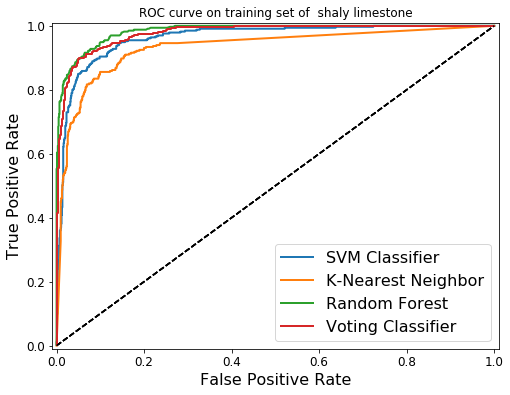

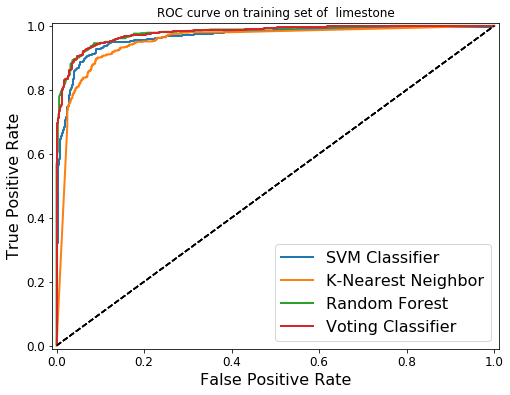

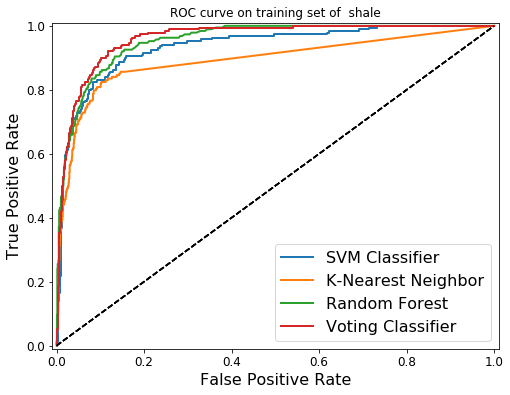

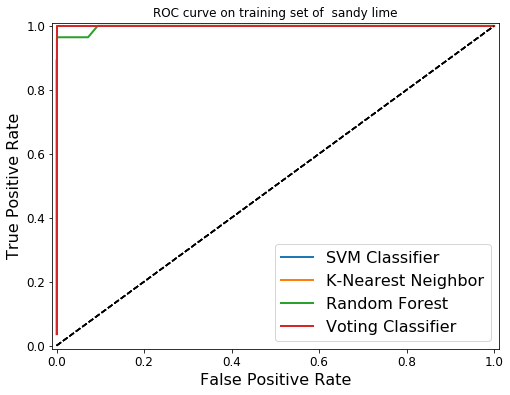

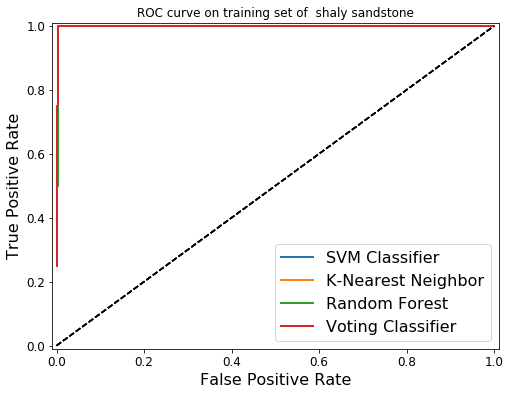

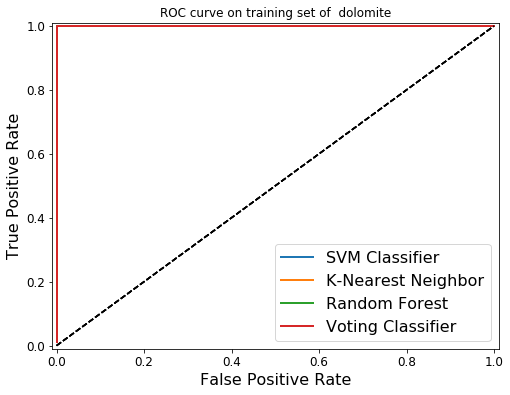

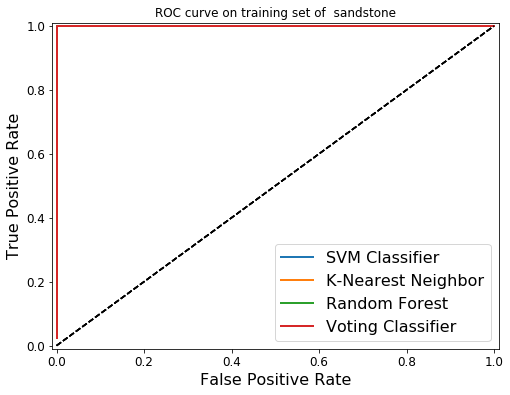

In [284]:
for y_train_all, y_test_all, y_strings_all in zip(y_trains_classes, 
                                                    y_test_classes, y_classes_names):
    #ROC-curves of SVM
    y_svm_proba_train = cross_val_predict(svm_clf_GS, X_train, y_train_all, cv=4,
                             method="predict_proba")
    y_svm_scores_train = y_svm_proba_train[:, 1]

    fpr_svm_train, tpr_svm_train, thresholds_svm_train = roc_curve(
                                                                    y_train_all, 
                                                                    y_svm_scores_train)
    

    #ROC-curves for KNN
    y_knn_proba_train = cross_val_predict(knn_clf_GS, X_train, y_train_all, cv=4,
                             method="predict_proba")
    y_knn_scores_train = y_knn_proba_train[:, 1]

    fpr_knn_train, tpr_knn_train, thresholds_knn_train = roc_curve(
                                                                    y_train_all, 
                                                                    y_knn_scores_train)
    
    
    #ROC-curves for RandomForestClf
    y_randfor_proba_train = cross_val_predict(for_clf_GS, X_train, y_train_all, cv=4,
                             method="predict_proba")
    y_randfor_scores_train = y_randfor_proba_train[:, 1]

    fpr_randfor_train, tpr_randfor_train, thresholds_randfor_trainr = roc_curve(
                                                                                y_train_all, 
                                                                                y_randfor_scores_train)
    
    
    #ROC-curves for voting

    y_voting_proba_train_all = cross_val_predict(voting_clf_all, X_train, y_train_all, cv=4,
                             method="predict_proba")
    y_voting_scores_train_all = y_voting_proba_train_all[:, 1]
    fpr_voting_train_all, tpr_voting_train_all, thresholds_voting_train_all = roc_curve(y_train_all, 
                                                                                 y_voting_scores_train_all)
    
    #Plotting ROC-curves for each class
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr_svm_train, tpr_svm_train, "SVM Classifier")
    plot_roc_curve(fpr_knn_train, tpr_knn_train, "K-Nearest Neighbor")
    plot_roc_curve(fpr_randfor_train, tpr_randfor_train, "Random Forest")
    plot_roc_curve(fpr_voting_train_all, tpr_voting_train_all, "Voting Classifier")
    plt.legend(loc="lower right", fontsize=16)
    plt.title('ROC curve on training set of  %s'%(y_strings_all))
    plt.axis([-0.01, 1.01, -0.01, 1.01])
    plt.show()

**ROC-performance on all classes of test sets:**

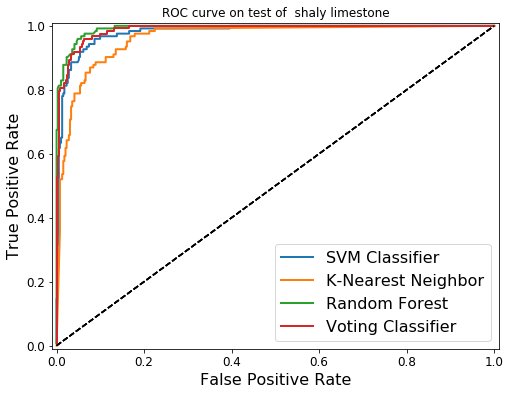

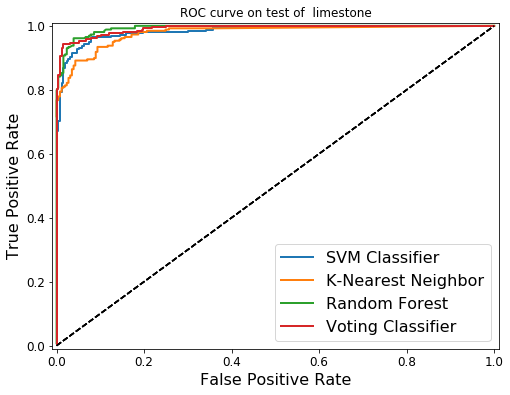

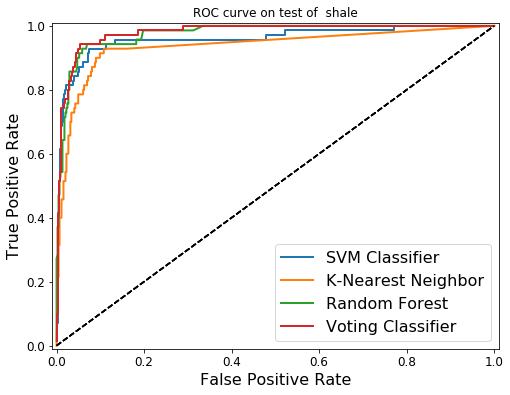

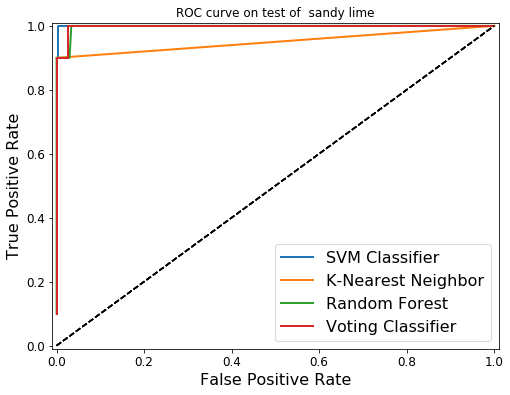

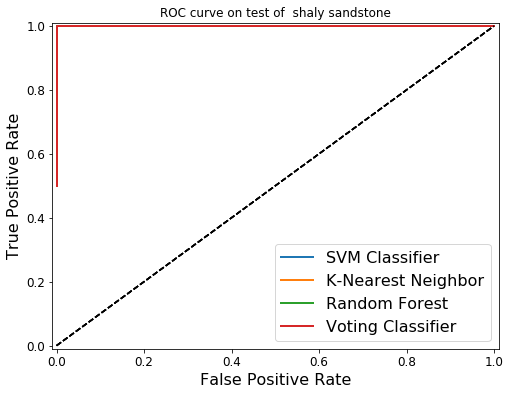

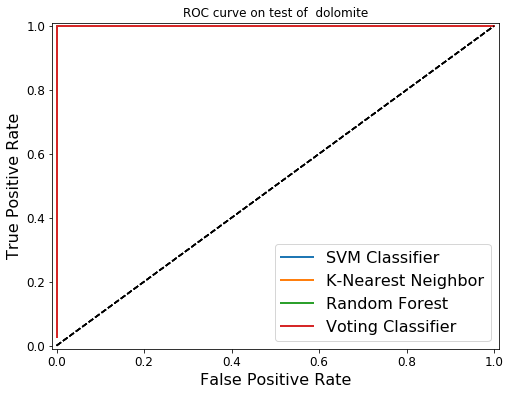

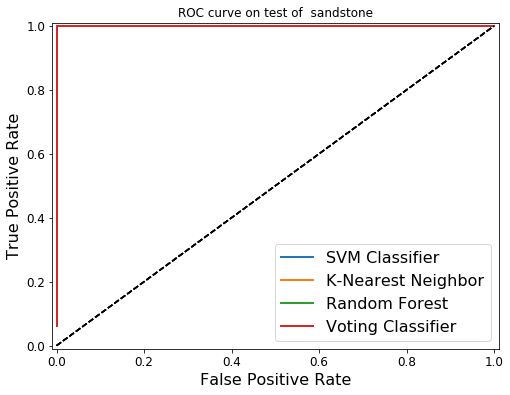

In [285]:
for y_train_all, y_test_all, y_strings_all in zip(y_trains_classes, 
                                                    y_test_classes, y_classes_names):    
    
    svm_clf_GS.fit(X_train, y_train_all)
    y_svm_proba_test = svm_clf_GS.predict_proba(X_test_prepared)
    y_svm_scores_test = y_svm_proba_test[:, 1]

    fpr_svm_test, tpr_svm_test, thresholds_svm_test = roc_curve(y_test_all, 
                                                                y_svm_scores_test)
    
    knn_clf_GS.fit(X_train, y_train_all)
    y_knn_proba_test = knn_clf_GS.predict_proba(X_test_prepared)
    y_knn_scores_test = y_knn_proba_test[:, 1]

    fpr_knn_test, tpr_knn_test, thresholds_knn_test = roc_curve(y_test_all, 
                                                                y_knn_scores_test)
    
    for_clf_GS.fit(X_train, y_train_all)
    y_randfor_proba_test = for_clf_GS.predict_proba(X_test_prepared)
    y_randfor_scores_test = y_randfor_proba_test[:, 1]

    fpr_randfor_test, tpr_randfor_test, thresholds_randfor_test = roc_curve(y_test_all, 
                                                                            y_randfor_scores_test)
    
    voting_clf_all.fit(X_train, y_train_all)
    y_probas_voting_all = voting_clf_all.predict_proba(X_test_prepared)
    y_scores_voting_all = y_probas_voting_all[:, 1] # score = proba of positive class
    fpr_voting_test_all, tpr_voting_test_all, thresholds_voting_test_all = roc_curve(y_test_all,
                                                                              y_scores_voting_all)
    
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr_svm_test, tpr_svm_test, "SVM Classifier")
    plot_roc_curve(fpr_knn_test, tpr_knn_test, "K-Nearest Neighbor")
    plot_roc_curve(fpr_randfor_test, tpr_randfor_test, "Random Forest")
    plot_roc_curve(fpr_voting_test_all, tpr_voting_test_all, "Voting Classifier")
    plt.legend(loc="lower right", fontsize=16)
    plt.title('ROC curve on test of  %s'%(y_strings_all))
    plt.axis([-0.01, 1.01, -0.01, 1.01])
    plt.show()

**Manual Voting on Shaly Limestone:**

In [286]:
# parameters for random forest
rfclf_params_sl = {
    'n_estimators': 500, 
    'bootstrap': True, 
    'class_weight':None, 
    'criterion':'gini',
    'max_depth':None, 
    'max_features':'auto',
    'random_state' : 41
    
    # ... fill in the rest you want here
}

# Fill in svm params here
svm_params_sl = {
    'C': 100,
    'probability':True,
    'random_state' : 42
}

# KNeighbors params go here
kneighbors_params_sl= {
    'n_neighbors': 5,
    'weights':'distance'
}

params_sl = [rfclf_params_sl, svm_params_sl, kneighbors_params_sl]
classifiers_sl = [RandomForestClassifier, SVC, KNeighborsClassifier]

In [287]:
def ensemble_test(classifiers, params, X_train, y_train, X_test):
    best_preds_test = np.zeros((len(X_test), 2))
    classes_test = np.unique(y_train)

    for i in range(len(classifiers)):
        # Construct the classifier by unpacking params 
        # store classifier instance
        clf_test = classifiers[i](**params[i])
        # Fit the classifier as usual and call predict_proba
        clf_test.fit(X_train, y_train)
        y_preds_test = clf_test.predict_proba(X_test)
        # Take maximum probability for each class on each classifier 
        # This is done for every instance in X_test
        best_preds_test = np.maximum(best_preds_test, y_preds_test)

    # map the maximum probability for each instance back to its corresponding class
    preds_test = np.array([classes_test[np.argmax(pred)] for pred in best_preds_test])
    return preds_test

In [288]:
from sklearn.metrics import accuracy_score, f1_score
y_preds_test_sl = ensemble_test(classifiers_sl, params_sl, X_train, y_train_sl, X_test_prepared)
print('Accuracy score = ',accuracy_score(y_test_sl, y_preds_test_sl),'\n',
     'f1_score = ', f1_score(y_test_sl, y_preds_test_sl, average = 'weighted'),'\n',
     'roc_auc_score = ', roc_auc_score(y_test_sl, y_preds_test_sl, average = 'weighted'))

Accuracy score =  0.949514563107 
 f1_score =  0.949653574035 
 roc_auc_score =  0.933362369338


Generalizing manual voting for all classes:

In [289]:
# parameters for random forest
rfclf_params = {
    'n_estimators': 500, 
    'bootstrap': True, 
    'class_weight':None, 
    'criterion':'gini',
    'max_depth':None, 
    'max_features':'auto',
    'warm_start': True,
    'random_state': 41
    # ... fill in the rest you want here
}

# Fill in svm params here
svm_params = {
    'C': 100,
    'probability':True,
    'random_state':42
}

# KNeighbors params go here
kneighbors_params= {
    'n_neighbors': 5,
    'weights':'distance'
}

In [290]:
y_test_classes = (y_test_sl, y_test_lim, y_test_shale, y_test_sandlim, y_test_ss, y_test_dol, y_test_sand)
classifiers = [RandomForestClassifier, SVC, KNeighborsClassifier]
params = [rfclf_params, svm_params, kneighbors_params]
y_trains_classes= (y_train_sl, y_train_lim, y_train_shale, y_train_sandlim, 
                   y_train_ss, y_train_dol, y_train_sand)
y_classes_names = ("shaly limestone", "limestone", "shale", "sandy lime", 
                   "shaly sandstone", "dolomite", "sandstone")

In [291]:
#Just get predictions
for y_trains, y_test, y_strings in zip(y_trains_classes, y_test_classes, y_classes_names):
    y_preds_test = ensemble_test(classifiers, params, X_train, y_trains, X_test_prepared)
    print("\n","Accuracy score for", y_strings, "=", accuracy_score(y_test, y_preds_test))
    print("f1_score for", y_strings, "=", f1_score(y_test, y_preds_test,
                                                        average = 'weighted', labels=np.unique(y_preds_test)))
    print("roc auc score for", y_strings, "=", roc_auc_score(y_test, y_preds_test,
                                                                  average = 'weighted'))


 Accuracy score for shaly limestone = 0.949514563107
f1_score for shaly limestone = 0.949653574035
roc auc score for shaly limestone = 0.933362369338

 Accuracy score for limestone = 0.957281553398
f1_score for limestone = 0.957272532095
roc auc score for limestone = 0.957311555515

 Accuracy score for shale = 0.95145631068
f1_score for shale = 0.948556595316
roc auc score for shale = 0.845505617978

 Accuracy score for sandy lime = 0.998058252427
f1_score for sandy lime = 0.998008114117
roc auc score for sandy lime = 0.95

 Accuracy score for shaly sandstone = 0.996116504854
f1_score for shaly sandstone = 0.998054474708
roc auc score for shaly sandstone = 0.5

 Accuracy score for dolomite = 1.0
f1_score for dolomite = 1.0
roc auc score for dolomite = 1.0

 Accuracy score for sandstone = 0.996116504854
f1_score for sandstone = 0.996226826208
roc auc score for sandstone = 0.997995991984
